In [1]:
import numpy as np
import pandas as pd
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

import tensorflow as tf

In [2]:
files = glob.glob('*.csv')


In [3]:
dfs = []
for file in files:
    if file != 'extraterrestrial data.csv':
        df = pd.read_csv(file)
        dfs.append(df)

In [4]:
dfs

[                Date/Time  \
 0     Year 1 Jan 01 01:00   
 1     Year 1 Jan 01 02:00   
 2     Year 1 Jan 01 03:00   
 3     Year 1 Jan 01 04:00   
 4     Year 1 Jan 01 05:00   
 ...                   ...   
 8754  Year 1 Dec 31 19:00   
 8755  Year 1 Dec 31 20:00   
 8756  Year 1 Dec 31 21:00   
 8757  Year 1 Dec 31 22:00   
 8758  Year 1 Dec 31 23:00   
 
       [1] Site Diffuse Solar Radiation Rate per Area  (W/m2)  \
 0                                                   0.0        
 1                                                   0.0        
 2                                                   0.0        
 3                                                   0.0        
 4                                                   0.0        
 ...                                                 ...        
 8754                                                0.0        
 8755                                                0.0        
 8756                                                

In [5]:
data=pd.concat(dfs)

In [6]:
data


,Date/Time,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Site Solar Azimuth Angle (deg),[1] Site Wind Direction (deg),[1] Site Wind Speed (m/s),[1] Surface Outside Face Temperature (C),Orientation,Lats,Longs,[1] Dry Bulb Temperature (C),[1] Global Horizontal Radiation (Wh/m2),[1] Relative Humidity (),DNR,SC,hdi
0,Year 1 Jan 01 01:00,0.0,0.0,5.600,14.075,-86.550209,91.104045,220.00,2.925,17.425801,0,23.0225,72.5714,13.7,0,58,0,0,0
1,Year 1 Jan 01 02:00,0.0,0.0,6.500,13.550,-75.710457,93.157099,180.00,1.725,17.436224,0,23.0225,72.5714,13.5,0,64,0,0,0
2,Year 1 Jan 01 03:00,0.0,0.0,7.400,13.125,-61.958056,96.159063,45.00,0.350,17.430286,0,23.0225,72.5714,13.0,0,70,0,0,0
3,Year 1 Jan 01 04:00,0.0,0.0,7.825,12.400,-48.286846,99.382686,0.00,0.375,17.410444,0,23.0225,72.5714,12.2,0,75,0,0,0
4,Year 1 Jan 01 05:00,0.0,0.0,7.975,11.600,-34.749348,102.923038,0.00,0.875,17.374948,0,23.0225,72.5714,11.4,0,80,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,Year 1 Dec 31 19:00,0.0,0.0,6.325,21.350,-12.176278,249.653350,3.75,0.025,23.663594,90,22.7196,75.8577,20.7,0,39,0,0,0
8755,Year 1 Dec 31 20:00,0.0,0.0,6.550,18.375,-25.321975,254.015331,0.00,0.000,22.149918,90,22.7196,75.8577,17.6,0,48,0,0,0
8756,Year 1 Dec 31 21:00,0.0,0.0,7.050,16.025,-38.737982,257.722237,30.75,0.000,20.445485,90,22.7196,75.8577,15.5,0,58,0,0,0
8757,Year 1 Dec 31 22:00,0.0,0.0,7.575,14.450,-52.333160,260.924964,87.50,0.525,19.256711,90,22.7196,75.8577,14.1,0,65,0,0,0


In [7]:
# data.to_excel("input_data.xlsx") 


In [8]:
data.dtypes

Date/Time                                                  object
[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)    float64
[1] Site Direct Solar Radiation Rate per Area  (W/m2)     float64
[1] Site Outdoor Air Dewpoint Temperature  (C)            float64
[1] Site Outdoor Air Drybulb Temperature  (C)             float64
[1] Site Solar Altitude Angle  (deg)                      float64
[1] Site Solar Azimuth Angle  (deg)                       float64
[1] Site Wind Direction  (deg)                            float64
[1] Site Wind Speed  (m/s)                                float64
[1] Surface Outside Face Temperature  (C)                 float64
Orientation                                                 int64
Lats                                                      float64
Longs                                                     float64
[1] Dry Bulb Temperature (C)                              float64
[1] Global Horizontal Radiation (Wh/m2)                     int64
[1] Relati

In [9]:
import pandas as pd

# Assuming data_a0 is your DataFrame
data['Date/Time'] = pd.to_datetime(data['Date/Time'].str.replace('Year 1 ', '2002'), format="%Y%b %d %H:%M")


In [10]:
data

,Date/Time,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Site Solar Azimuth Angle (deg),[1] Site Wind Direction (deg),[1] Site Wind Speed (m/s),[1] Surface Outside Face Temperature (C),Orientation,Lats,Longs,[1] Dry Bulb Temperature (C),[1] Global Horizontal Radiation (Wh/m2),[1] Relative Humidity (),DNR,SC,hdi
0,2002-01-01 01:00:00,0.0,0.0,5.600,14.075,-86.550209,91.104045,220.00,2.925,17.425801,0,23.0225,72.5714,13.7,0,58,0,0,0
1,2002-01-01 02:00:00,0.0,0.0,6.500,13.550,-75.710457,93.157099,180.00,1.725,17.436224,0,23.0225,72.5714,13.5,0,64,0,0,0
2,2002-01-01 03:00:00,0.0,0.0,7.400,13.125,-61.958056,96.159063,45.00,0.350,17.430286,0,23.0225,72.5714,13.0,0,70,0,0,0
3,2002-01-01 04:00:00,0.0,0.0,7.825,12.400,-48.286846,99.382686,0.00,0.375,17.410444,0,23.0225,72.5714,12.2,0,75,0,0,0
4,2002-01-01 05:00:00,0.0,0.0,7.975,11.600,-34.749348,102.923038,0.00,0.875,17.374948,0,23.0225,72.5714,11.4,0,80,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2002-12-31 19:00:00,0.0,0.0,6.325,21.350,-12.176278,249.653350,3.75,0.025,23.663594,90,22.7196,75.8577,20.7,0,39,0,0,0
8755,2002-12-31 20:00:00,0.0,0.0,6.550,18.375,-25.321975,254.015331,0.00,0.000,22.149918,90,22.7196,75.8577,17.6,0,48,0,0,0
8756,2002-12-31 21:00:00,0.0,0.0,7.050,16.025,-38.737982,257.722237,30.75,0.000,20.445485,90,22.7196,75.8577,15.5,0,58,0,0,0
8757,2002-12-31 22:00:00,0.0,0.0,7.575,14.450,-52.333160,260.924964,87.50,0.525,19.256711,90,22.7196,75.8577,14.1,0,65,0,0,0


In [11]:
data.iloc[50]

Date/Time                                                 2002-01-03 03:00:00
[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)                    0.0
[1] Site Direct Solar Radiation Rate per Area  (W/m2)                     0.0
[1] Site Outdoor Air Dewpoint Temperature  (C)                           6.15
[1] Site Outdoor Air Drybulb Temperature  (C)                            11.8
[1] Site Solar Altitude Angle  (deg)                               -62.150707
[1] Site Solar Azimuth Angle  (deg)                                 95.739049
[1] Site Wind Direction  (deg)                                            0.0
[1] Site Wind Speed  (m/s)                                              0.125
[1] Surface Outside Face Temperature  (C)                           17.089917
Orientation                                                                 0
Lats                                                                  23.0225
Longs                                                           

<Axes: >

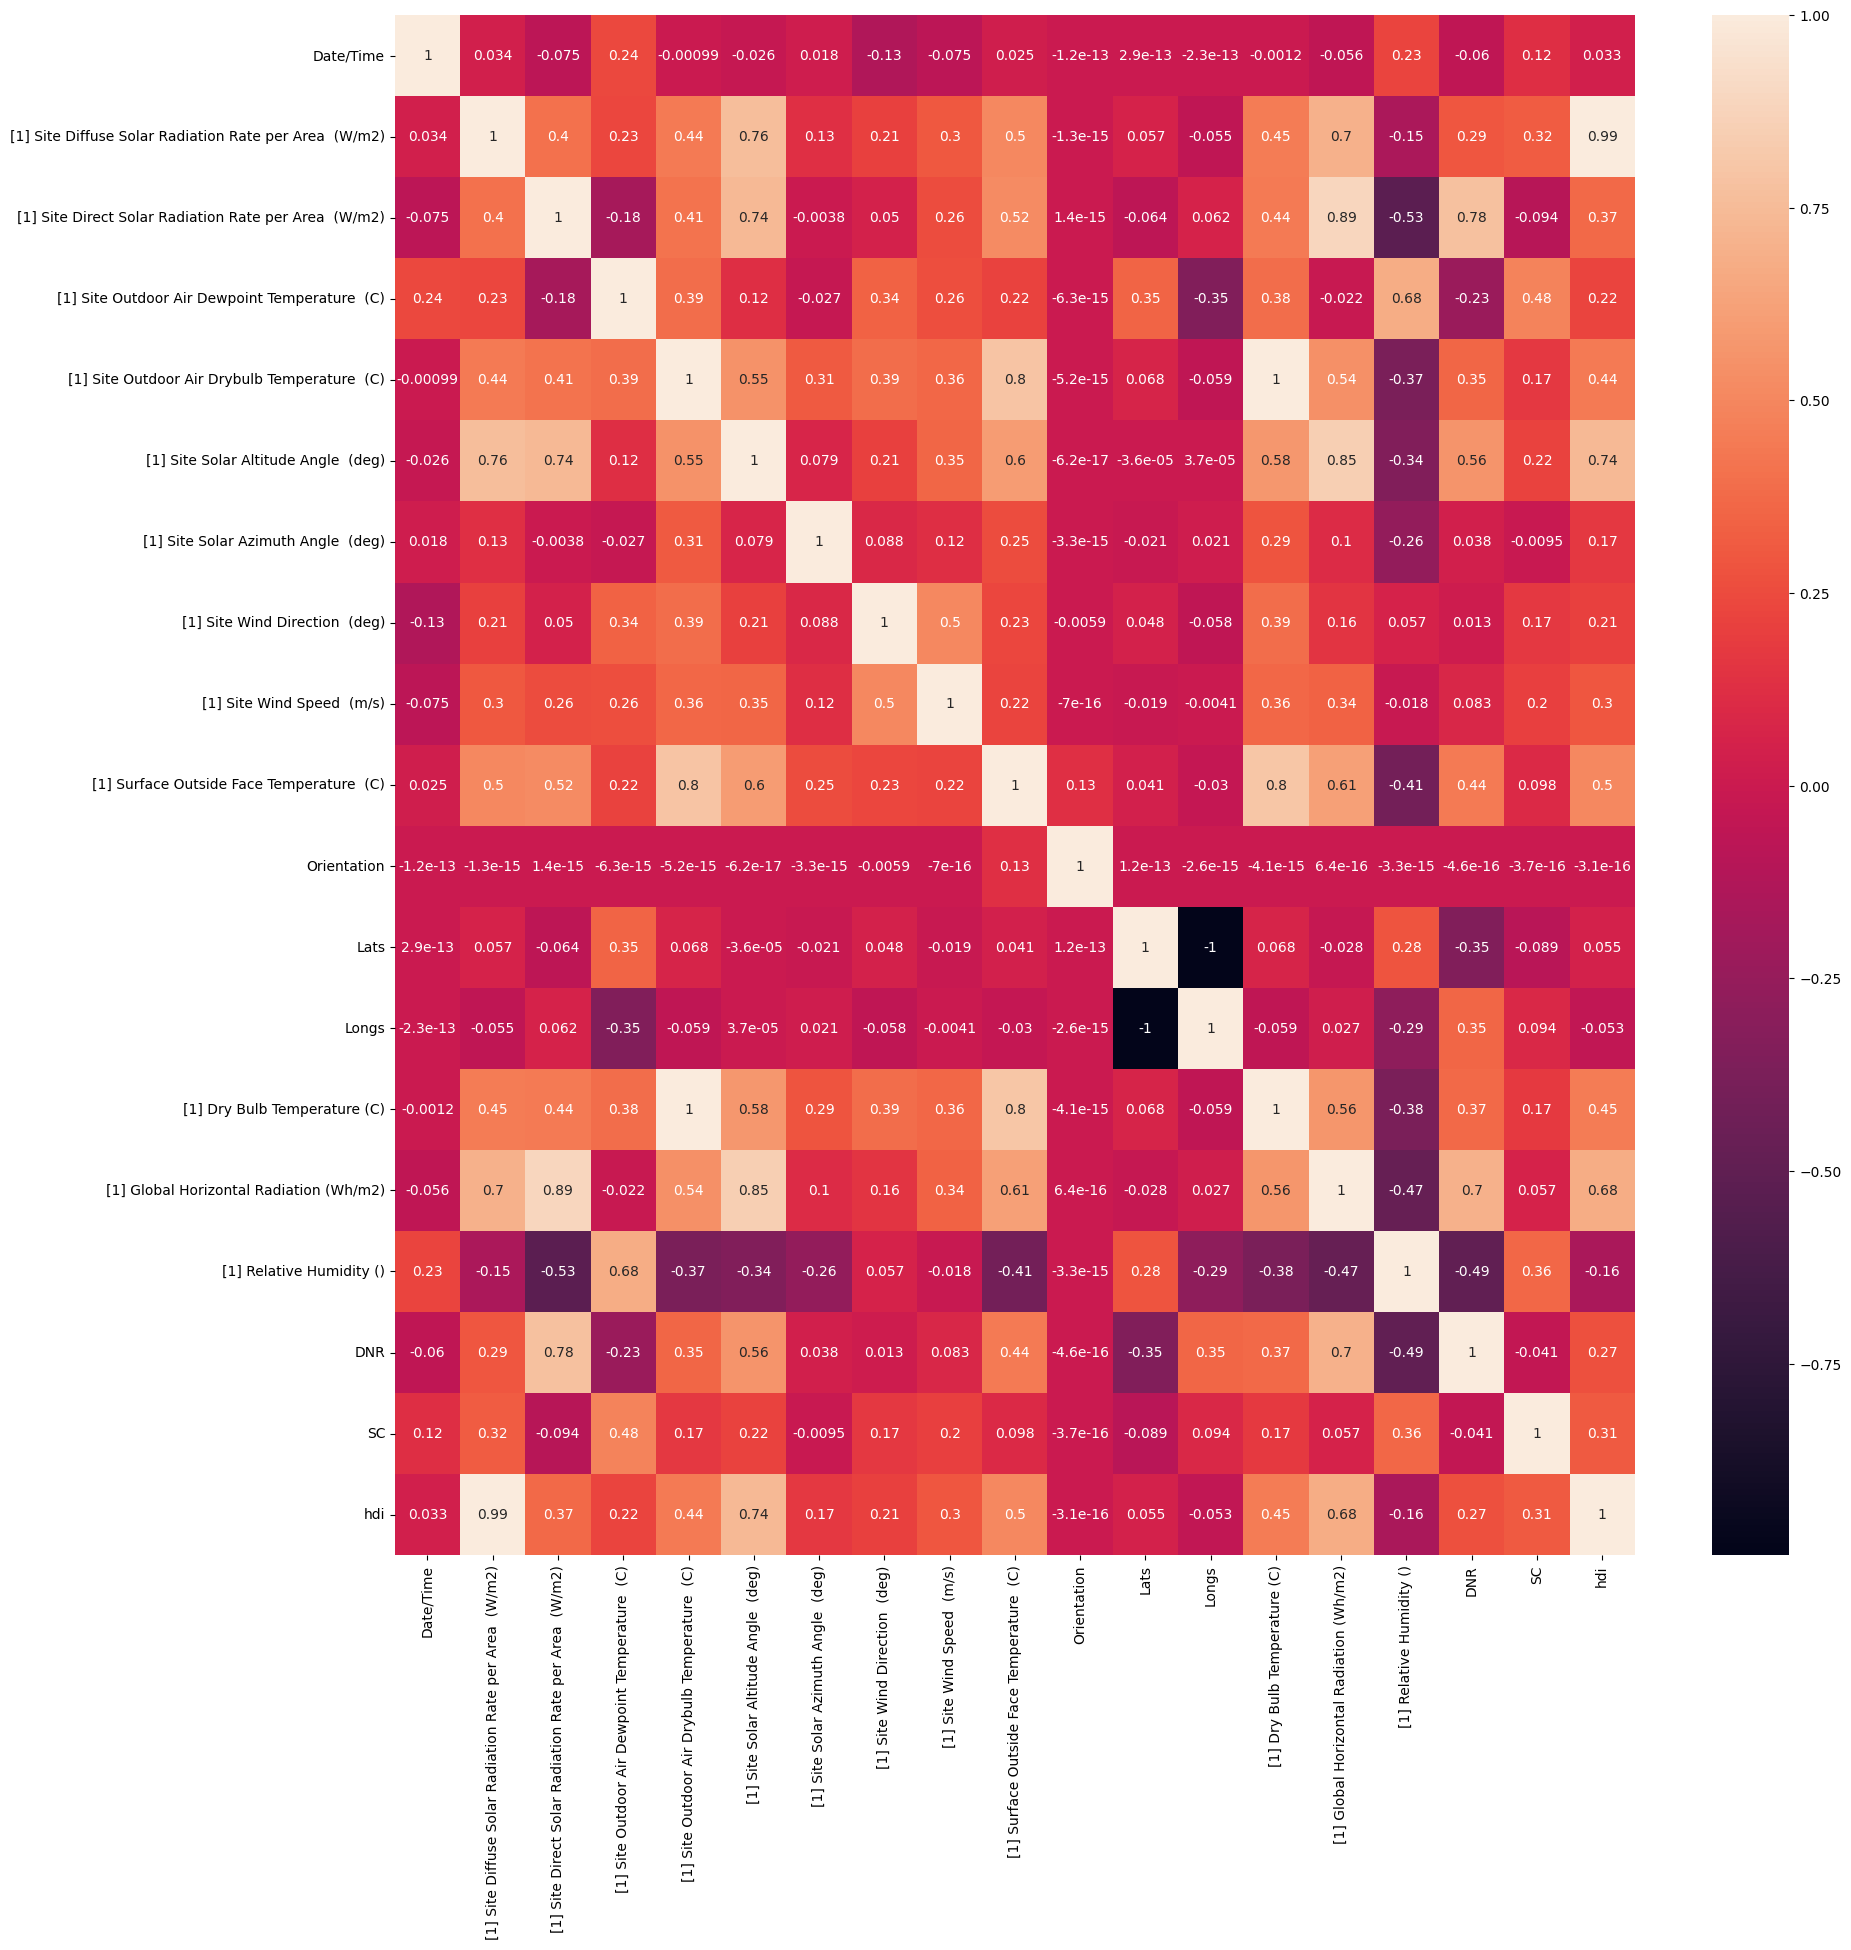

In [12]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(),annot = True)

In [13]:
data.dtypes
# Assuming theta, phi, and h are given angles in radians


Date/Time                                                 datetime64[ns]
[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)           float64
[1] Site Direct Solar Radiation Rate per Area  (W/m2)            float64
[1] Site Outdoor Air Dewpoint Temperature  (C)                   float64
[1] Site Outdoor Air Drybulb Temperature  (C)                    float64
[1] Site Solar Altitude Angle  (deg)                             float64
[1] Site Solar Azimuth Angle  (deg)                              float64
[1] Site Wind Direction  (deg)                                   float64
[1] Site Wind Speed  (m/s)                                       float64
[1] Surface Outside Face Temperature  (C)                        float64
Orientation                                                        int64
Lats                                                             float64
Longs                                                            float64
[1] Dry Bulb Temperature (C)                       

In [14]:
%pip install ephem

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
data.columns

Index(['Date/Time', '[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Direct Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Outdoor Air Dewpoint Temperature  (C)',
       '[1] Site Outdoor Air Drybulb Temperature  (C)',
       '[1] Site Solar Altitude Angle  (deg)',
       '[1] Site Solar Azimuth Angle  (deg)', '[1] Site Wind Direction  (deg)',
       '[1] Site Wind Speed  (m/s)',
       '[1] Surface Outside Face Temperature  (C)', 'Orientation', 'Lats',
       'Longs', '[1] Dry Bulb Temperature (C)',
       '[1] Global Horizontal Radiation (Wh/m2)', '[1] Relative Humidity ()',
       'DNR', 'SC', 'hdi'],
      dtype='object')

In [16]:
# import math
# import ephem
# import pandas as pd

# def calculate_solar_parameters(data_row):
#     # Set observer's latitude and longitude
#     o.lat, o.long = str(data_row['Lats']), str(data_row['Longs'])

#     # Get the Sun object
#     sun = ephem.Sun()

#     # Calculate sunrise, solar noon, and sunset
#     sunrise = o.previous_rising(sun, start=ephem.now())
#     solar_noon = o.next_transit(sun, start=sunrise)
#     sunset = o.next_setting(sun, start=solar_noon)

#     # Convert ephem.Date to pandas Timestamp
#     solar_noon = pd.to_datetime(solar_noon.datetime())

#     # Determine if the given time is before or after solar noon
#     given_time = data_row['Date/Time']
#     if given_time < solar_noon:
#         hourangle = 2.5 * (abs((given_time - solar_noon).seconds) // 60)
#     else:
#         hourangle = -2.5 * (abs((given_time - solar_noon).seconds) // 60)

#     # Calculate declination
#     N = data_row['N']
#     declination = 23.45 * math.sin(math.radians(360 * (284 + N) / 365))

#     # Get azimuth from the data_row
#     azimuth = data_row['[1] Site Solar Azimuth Angle  (deg)']

#     return declination, hourangle, azimuth

# def calculate_tt(data_row):
#     # Get solar parameters
#     declination, hourangle, azimuth = calculate_solar_parameters(data_row)

#     # Convert angles to radians for trigonometric functions
#     latitude_rad = math.radians(data_row['Lats'])
#     declination_rad = math.radians(declination)
#     hourangle_rad = math.radians(hourangle)
#     azimuth_rad = math.radians(azimuth)

#     # Calculate the cosine of tt using the given formula
#     cos_tt = (
#         -math.cos(latitude_rad) * math.sin(declination_rad) * math.cos(azimuth_rad)
#         + math.sin(latitude_rad) * math.cos(declination_rad) * math.cos(hourangle_rad) * math.cos(azimuth_rad)
#         + math.cos(declination_rad) * math.sin(hourangle_rad) * math.sin(azimuth_rad)
#     )

#     # Calculate tt using the arccosine function
#     tt = cos_tt

#     return tt

# # Assuming your DataFrame is named 'data'
# data['N'] = data['Date/Time'].dt.dayofyear

# # Create an observer
# o = ephem.Observer()

# # Apply the functions to each row of the DataFrame
# data['cos_incident_angle'] = data.apply(calculate_tt, axis=1)

# # Display the result
# print(data[['Date/Time', 'Lats', 'Longs', 'cos_incident_angle']])


In [17]:
import numpy as np
import pandas as pd

# Assuming you have the DataFrame 'data' with the given columns
# Set observer's latitude and longitude
lstm = 15 * 5.5  # Local Standard Time Meridian for India

# Calculate the day of the year from the 'Date/Time' column
data['Date/Time'] = pd.to_datetime(data['Date/Time'])
data['day'] = data['Date/Time'].dt.dayofyear

# Calculate Equation of Time (EoT)
B = 360 / 365 * (data['day'] - 81)
eot = 9.87 * np.sin(2 * np.radians(B)) - 7.53 * np.cos(np.radians(B)) - 1.5 * np.sin(np.radians(B))

# Calculate Time Correction (TC)
tc = 4 * (data['Longs'] - lstm) + eot

# Convert 'Date/Time' to local time (Local Standard Time, LST)
data['Local Time'] = data['Date/Time'] + pd.to_timedelta(tc, unit='m')

# Calculate Hour Angle (HRA)
data['hra'] = 15 * (data['Local Time'].dt.hour + data['Local Time'].dt.minute / 60 - 12)




In [18]:
data

,Date/Time,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Site Solar Azimuth Angle (deg),[1] Site Wind Direction (deg),[1] Site Wind Speed (m/s),[1] Surface Outside Face Temperature (C),...,Longs,[1] Dry Bulb Temperature (C),[1] Global Horizontal Radiation (Wh/m2),[1] Relative Humidity (),DNR,SC,hdi,day,Local Time,hra
0,2002-01-01 01:00:00,0.0,0.0,5.600,14.075,-86.550209,91.104045,220.00,2.925,17.425801,...,72.5714,13.7,0,58,0,0,0,1,2002-01-01 00:16:34.825300596,-176.0
1,2002-01-01 02:00:00,0.0,0.0,6.500,13.550,-75.710457,93.157099,180.00,1.725,17.436224,...,72.5714,13.5,0,64,0,0,0,1,2002-01-01 01:16:34.825300596,-161.0
2,2002-01-01 03:00:00,0.0,0.0,7.400,13.125,-61.958056,96.159063,45.00,0.350,17.430286,...,72.5714,13.0,0,70,0,0,0,1,2002-01-01 02:16:34.825300596,-146.0
3,2002-01-01 04:00:00,0.0,0.0,7.825,12.400,-48.286846,99.382686,0.00,0.375,17.410444,...,72.5714,12.2,0,75,0,0,0,1,2002-01-01 03:16:34.825300596,-131.0
4,2002-01-01 05:00:00,0.0,0.0,7.975,11.600,-34.749348,102.923038,0.00,0.875,17.374948,...,72.5714,11.4,0,80,0,0,0,1,2002-01-01 04:16:34.825300596,-116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2002-12-31 19:00:00,0.0,0.0,6.325,21.350,-12.176278,249.653350,3.75,0.025,23.663594,...,75.8577,20.7,0,39,0,0,0,365,2002-12-31 18:30:10.473904572,97.5
8755,2002-12-31 20:00:00,0.0,0.0,6.550,18.375,-25.321975,254.015331,0.00,0.000,22.149918,...,75.8577,17.6,0,48,0,0,0,365,2002-12-31 19:30:10.473904572,112.5
8756,2002-12-31 21:00:00,0.0,0.0,7.050,16.025,-38.737982,257.722237,30.75,0.000,20.445485,...,75.8577,15.5,0,58,0,0,0,365,2002-12-31 20:30:10.473904572,127.5
8757,2002-12-31 22:00:00,0.0,0.0,7.575,14.450,-52.333160,260.924964,87.50,0.525,19.256711,...,75.8577,14.1,0,65,0,0,0,365,2002-12-31 21:30:10.473904572,142.5


In [19]:

# Assuming data['day'], data['Lats'], data['hra'], and data['[1] Site Solar Altitude Angle  (deg)'] are available

# Calculate declination
day_angle = 360 * (284 + data['day']) / 365
data['declination'] = 23.45 * np.sin(np.radians(day_angle))

# Assuming data['Lats'] represents latitude
latitude = data['Lats']

# Assuming data['hra'] represents hour angle
hour_angle = data['hra']

# Calculate solar zenith angle
data['solar_zenith'] = 90 - data['[1] Site Solar Altitude Angle  (deg)']


In [20]:
import numpy as np
import pandas as pd

def solar_altitude_angle(LAT, delta, H):

    # Convert degrees to radians
    LAT_rad = np.radians(LAT)
    delta_rad = np.radians(delta)
    H_rad = np.radians(H)
    
    # Calculate solar elevation angle
    beta_rad = np.arcsin(np.sin(LAT_rad) * np.sin(delta_rad) + np.cos(LAT_rad) * np.cos(delta_rad) * np.cos(H_rad))
    beta_deg = np.degrees(beta_rad)
    
    return beta_deg

# Assuming your DataFrame is named 'data'
# Extract required columns
LAT = data['Lats']
delta = data['declination']
H = data['hra']

# Calculate solar elevation angle
data['Solar Altitde Angle'] = solar_altitude_angle(LAT, delta, H)




In [21]:
data

,Date/Time,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Site Solar Azimuth Angle (deg),[1] Site Wind Direction (deg),[1] Site Wind Speed (m/s),[1] Surface Outside Face Temperature (C),...,[1] Relative Humidity (),DNR,SC,hdi,day,Local Time,hra,declination,solar_zenith,Solar Altitde Angle
0,2002-01-01 01:00:00,0.0,0.0,5.600,14.075,-86.550209,91.104045,220.00,2.925,17.425801,...,58,0,0,0,1,2002-01-01 00:16:34.825300596,-176.0,-23.011637,176.550209,-86.318545
1,2002-01-01 02:00:00,0.0,0.0,6.500,13.550,-75.710457,93.157099,180.00,1.725,17.436224,...,64,0,0,0,1,2002-01-01 01:16:34.825300596,-161.0,-23.011637,165.710457,-72.524979
2,2002-01-01 03:00:00,0.0,0.0,7.400,13.125,-61.958056,96.159063,45.00,0.350,17.430286,...,70,0,0,0,1,2002-01-01 02:16:34.825300596,-146.0,-23.011637,151.958056,-58.779093
3,2002-01-01 04:00:00,0.0,0.0,7.825,12.400,-48.286846,99.382686,0.00,0.375,17.410444,...,75,0,0,0,1,2002-01-01 03:16:34.825300596,-131.0,-23.011637,138.286846,-45.124571
4,2002-01-01 05:00:00,0.0,0.0,7.975,11.600,-34.749348,102.923038,0.00,0.875,17.374948,...,80,0,0,0,1,2002-01-01 04:16:34.825300596,-116.0,-23.011637,124.749348,-31.616816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2002-12-31 19:00:00,0.0,0.0,6.325,21.350,-12.176278,249.653350,3.75,0.025,23.663594,...,39,0,0,0,365,2002-12-31 18:30:10.473904572,97.5,-23.085911,102.176278,-15.200531
8755,2002-12-31 20:00:00,0.0,0.0,6.550,18.375,-25.321975,254.015331,0.00,0.000,22.149918,...,48,0,0,0,365,2002-12-31 19:30:10.473904572,112.5,-23.085911,115.321975,-28.435106
8756,2002-12-31 21:00:00,0.0,0.0,7.050,16.025,-38.737982,257.722237,30.75,0.000,20.445485,...,58,0,0,0,365,2002-12-31 20:30:10.473904572,127.5,-23.085911,128.737982,-41.912800
8757,2002-12-31 22:00:00,0.0,0.0,7.575,14.450,-52.333160,260.924964,87.50,0.525,19.256711,...,65,0,0,0,365,2002-12-31 21:30:10.473904572,142.5,-23.085911,142.333160,-55.551205


In [22]:


# Define a function to calculate solar azimuth angle for a single row
def calculate_single_solar_azimuth(local_hour, declination, latitude, hra):
    if local_hour < 12:
        return np.degrees(np.arccos((np.sin(np.radians(declination)) * np.cos(np.radians(latitude)) - np.cos(np.radians(declination)) * np.sin(np.radians(latitude)) * np.cos(np.radians(hra)))))
    else:
        return 360 - np.degrees(np.arccos((np.sin(np.radians(declination)) * np.cos(np.radians(latitude)) - np.cos(np.radians(declination)) * np.sin(np.radians(latitude)) * np.cos(np.radians(hra)))))

# Vectorized calculation of solar azimuth angle
data['solar_azimuth'] = np.where(data['Local Time'].dt.hour < 12,
                                  np.degrees(np.arccos((np.sin(np.radians(data['declination'])) * np.cos(np.radians(latitude)) - np.cos(np.radians(data['declination'])) * np.sin(np.radians(latitude)) * np.cos(np.radians(data['hra']))))),
                                  360 - np.degrees(np.arccos((np.sin(np.radians(data['declination'])) * np.cos(np.radians(latitude)) - np.cos(np.radians(data['declination'])) * np.sin(np.radians(latitude)) * np.cos(np.radians(data['hra']))))))


In [23]:
data['Wall Azimuth'] = data['Orientation'].replace({0: 180, 180: 0, 90: 270, 270: 90})

data['AOI'] = np.degrees(np.arccos(np.sin(np.radians(data['solar_zenith'])) * np.cos(np.radians(data['[1] Site Solar Azimuth Angle  (deg)']-data['Wall Azimuth']))))


In [24]:
data

,Date/Time,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Site Solar Azimuth Angle (deg),[1] Site Wind Direction (deg),[1] Site Wind Speed (m/s),[1] Surface Outside Face Temperature (C),...,SC,day,Local Time,hra,declination,solar_zenith,Solar Altitde Angle,solar_azimuth,Wall Azimuth,AOI
0,2002-01-01 01:00:00,0.0,0.0,5.600,14.075,-86.550209,91.104045,220.00,2.925,17.425801,...,0,1,2002-01-01 00:16:34.825300596,-176.0,-23.011637,176.550209,-86.318545,90.039378,180,89.933569
1,2002-01-01 02:00:00,0.0,0.0,6.500,13.550,-75.710457,93.157099,180.00,1.725,17.436224,...,0,1,2002-01-01 01:16:34.825300596,-161.0,-23.011637,165.710457,-72.524979,91.112878,180,89.221128
2,2002-01-01 03:00:00,0.0,0.0,7.400,13.125,-61.958056,96.159063,45.00,0.350,17.430286,...,0,1,2002-01-01 02:16:34.825300596,-146.0,-23.011637,151.958056,-58.779093,93.517420,180,87.108861
3,2002-01-01 04:00:00,0.0,0.0,7.825,12.400,-48.286846,99.382686,0.00,0.375,17.410444,...,0,1,2002-01-01 03:16:34.825300596,-131.0,-23.011637,138.286846,-45.124571,97.101033,180,83.772356
4,2002-01-01 05:00:00,0.0,0.0,7.975,11.600,-34.749348,102.923038,0.00,0.875,17.374948,...,0,1,2002-01-01 04:16:34.825300596,-116.0,-23.011637,124.749348,-31.616816,101.652816,180,79.411373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2002-12-31 19:00:00,0.0,0.0,6.325,21.350,-12.176278,249.653350,3.75,0.025,23.663594,...,0,365,2002-12-31 18:30:10.473904572,97.5,-23.085911,102.176278,-15.200531,251.620438,270,23.578469
8755,2002-12-31 20:00:00,0.0,0.0,6.550,18.375,-25.321975,254.015331,0.00,0.000,22.149918,...,0,365,2002-12-31 19:30:10.473904572,112.5,-23.085911,115.321975,-28.435106,256.954718,270,29.660956
8756,2002-12-31 21:00:00,0.0,0.0,7.050,16.025,-38.737982,257.722237,30.75,0.000,20.445485,...,0,365,2002-12-31 20:30:10.473904572,127.5,-23.085911,128.737982,-41.912800,261.639714,270,40.343649
8757,2002-12-31 22:00:00,0.0,0.0,7.575,14.450,-52.333160,260.924964,87.50,0.525,19.256711,...,0,365,2002-12-31 21:30:10.473904572,142.5,-23.085911,142.333160,-55.551205,265.422170,270,52.884766


In [25]:

# data['Eb']=data['[1] Global Horizontal Radiation (Wh/m2)']*np.cos(np.radians(data['AOI']))/(np.cos(np.radians(data['solar_zenith'])))
# data['Eg']=data['[1] Global Horizontal Radiation (Wh/m2)']*np.cos(np.radians(data['AOI']))

In [26]:
# plt.figure(figsize = (20,20))
# sns.heatmap(data.corr(),annot = True)

In [27]:
data.describe()

,Date/Time,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Site Solar Azimuth Angle (deg),[1] Site Wind Direction (deg),[1] Site Wind Speed (m/s),[1] Surface Outside Face Temperature (C),...,SC,day,Local Time,hra,declination,solar_zenith,Solar Altitde Angle,solar_azimuth,Wall Azimuth,AOI
count,105108,105108.000000,105108.000000,105108.000000,105108.000000,105108.000000,105108.000000,96349.000000,105108.000000,105108.000000,...,105108.000000,105108.000000,105108,105108.000000,1.051080e+05,105108.000000,105108.000000,105108.000000,105108.000000,105108.000000
mean,2002-07-02 12:00:00,78.309396,231.019608,16.296727,25.848619,0.227428,174.838904,169.285802,3.751532,30.128219,...,2.838490,183.020779,2002-07-02 11:20:47.705380864,-1.568111,2.627199e-03,89.772572,0.009303,179.589791,135.000000,90.000000
min,2002-01-01 01:00:00,0.000000,0.000000,-5.900000,-1.500000,-86.550209,4.730277,0.000000,0.000000,9.274649,...,0.000000,1.000000,2002-01-01 00:04:57.745300596,-180.000000,-2.344978e+01,3.449724,-89.159112,43.322320,0.000000,0.498288
25%,2002-04-02 06:00:00,0.000000,0.000000,10.025000,22.300000,-37.365723,87.134762,47.750000,1.500000,24.606212,...,0.000000,92.000000,2002-04-02 05:29:24.134121728,-90.250000,-1.654594e+01,52.584883,-37.805247,89.724738,67.500000,63.770880
50%,2002-07-02 12:00:00,6.750000,0.000000,17.400000,26.350000,0.247593,169.146494,209.250000,3.100000,29.156610,...,1.000000,183.000000,2002-07-02 11:16:37.596194304,-0.250000,-5.743593e-15,89.752407,-0.015481,136.059561,135.000000,90.000000
75%,2002-10-01 18:00:00,134.000000,426.000000,22.925000,29.950000,37.415117,267.856319,265.750000,5.475000,34.889548,...,6.000000,274.000000,2002-10-01 17:19:50.121851136,89.750000,1.654594e+01,127.365723,37.834909,269.736497,202.500000,116.229120
max,2002-12-31 23:00:00,548.500000,1100.000000,28.900000,43.925000,86.550276,347.296505,358.500000,26.850000,63.868828,...,10.000000,365.000000,2002-12-31 22:30:10.473904572,179.750000,2.344978e+01,176.550209,89.041402,315.992788,270.000000,179.501712
std,NaN,113.574154,330.532462,7.137327,6.171036,43.769597,97.401449,112.322566,2.956029,8.216458,...,3.206324,105.354596,NaN,103.885089,1.658086e+01,43.769597,43.769313,92.800212,100.623538,37.187120


In [28]:
table_data = {
    "Io": np.array([1416, 1401, 1381, 1356, 1336, 1336, 1336, 1338, 1359, 1380, 1405, 1417]),
    "A": np.array([1202, 1187, 1164, 1130, 1106, 1092, 1093, 1107, 1136, 1166, 1190, 1204]),
    "B": np.array([0.141, 0.142, 0.149, 0.164, 0.177, 0.185, 0.186, 0.182, 0.165, 0.152, 0.144, 0.141]),
    "C":np.array([0.103,0.104,0.109,0.120,0.130,0.137,0.138,0.134,0.121,0.111,0.106,0.103])
}
table_df = pd.DataFrame(table_data)


In [29]:
month_index = pd.to_datetime(data['Date/Time']).dt.month - 1

# Retrieve Io, A, and B values corresponding to the month index
Io_values = table_df.loc[month_index, 'Io'].values
A_values = table_df.loc[month_index, 'A'].values
B_values = table_df.loc[month_index, 'B'].values
C_values = table_df.loc[month_index, 'C'].values

# Calculate solar altitude angle in radians
solar_altitude_angle_rad = np.radians(data['[1] Site Solar Altitude Angle  (deg)'])

# Calculate direct normal irradiance using the ASHRAE Clear Sky Solar Model equation
direct_normal_irradiance = A_values / np.exp(B_values / np.sin(solar_altitude_angle_rad))

# Add the direct normal irradiance values as a new column in the DataFrame
data['Direct Solar Irradiance'] = direct_normal_irradiance*np.cos(np.radians(data['AOI']))
Y = 0.55 + 0.437 * np.cos(np.radians(data['AOI'])) + 0.313 * np.cos(np.radians(data['AOI']))**2
data['Diffuse Horizontal Irradiance']=C_values*Y*data['Direct Solar Irradiance']
data['Total clear sky Irradiation']=data['Direct Solar Irradiance']+data['Diffuse Horizontal Irradiance']

C:\ProgramData\anaconda3\envs\tf2\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [30]:
Io_values

array([1416, 1416, 1416, ..., 1417, 1417, 1417])

In [31]:
pd.set_option('display.max_columns', None)

data

,Date/Time,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Site Solar Azimuth Angle (deg),[1] Site Wind Direction (deg),[1] Site Wind Speed (m/s),[1] Surface Outside Face Temperature (C),Orientation,Lats,Longs,[1] Dry Bulb Temperature (C),[1] Global Horizontal Radiation (Wh/m2),[1] Relative Humidity (),DNR,SC,day,Local Time,hra,declination,solar_zenith,Solar Altitde Angle,solar_azimuth,Wall Azimuth,AOI,Direct Solar Irradiance,Diffuse Horizontal Irradiance,Total clear sky Irradiation
0,2002-01-01 01:00:00,0.0,0.0,5.600,14.075,-86.550209,91.104045,220.00,2.925,17.425801,0,23.0225,72.5714,13.7,0,58,0,0,1,2002-01-01 00:16:34.825300596,-176.0,-23.011637,176.550209,-86.318545,90.039378,180,89.933569,1.605078,0.091012,1.696090
1,2002-01-01 02:00:00,0.0,0.0,6.500,13.550,-75.710457,93.157099,180.00,1.725,17.436224,0,23.0225,72.5714,13.5,0,64,0,0,1,2002-01-01 01:16:34.825300596,-161.0,-23.011637,165.710457,-72.524979,91.112878,180,89.221128,18.898396,1.082270,19.980665
2,2002-01-01 03:00:00,0.0,0.0,7.400,13.125,-61.958056,96.159063,45.00,0.350,17.430286,0,23.0225,72.5714,13.0,0,70,0,0,1,2002-01-01 02:16:34.825300596,-146.0,-23.011637,151.958056,-58.779093,93.517420,180,87.108861,71.129052,4.196778,75.325830
3,2002-01-01 04:00:00,0.0,0.0,7.825,12.400,-48.286846,99.382686,0.00,0.375,17.410444,0,23.0225,72.5714,12.2,0,75,0,0,1,2002-01-01 03:16:34.825300596,-131.0,-23.011637,138.286846,-45.124571,97.101033,180,83.772356,157.500499,9.751191,167.251690
4,2002-01-01 05:00:00,0.0,0.0,7.975,11.600,-34.749348,102.923038,0.00,0.875,17.374948,0,23.0225,72.5714,11.4,0,80,0,0,1,2002-01-01 04:16:34.825300596,-116.0,-23.011637,124.749348,-31.616816,101.652816,180,79.411373,282.865312,18.671839,301.537151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2002-12-31 19:00:00,0.0,0.0,6.325,21.350,-12.176278,249.653350,3.75,0.025,23.663594,90,22.7196,75.8577,20.7,0,39,0,0,365,2002-12-31 18:30:10.473904572,97.5,-23.085911,102.176278,-15.200531,251.620438,270,23.578469,2153.232091,269.119154,2422.351245
8755,2002-12-31 20:00:00,0.0,0.0,6.550,18.375,-25.321975,254.015331,0.00,0.000,22.149918,90,22.7196,75.8577,17.6,0,48,0,0,365,2002-12-31 19:30:10.473904572,112.5,-23.085911,115.321975,-28.435106,256.954718,270,29.660956,1454.799729,174.731713,1629.531442
8756,2002-12-31 21:00:00,0.0,0.0,7.050,16.025,-38.737982,257.722237,30.75,0.000,20.445485,90,22.7196,75.8577,15.5,0,58,0,0,365,2002-12-31 20:30:10.473904572,127.5,-23.085911,128.737982,-41.912800,261.639714,270,40.343649,1149.580160,126.090867,1275.671027
8757,2002-12-31 22:00:00,0.0,0.0,7.575,14.450,-52.333160,260.924964,87.50,0.525,19.256711,90,22.7196,75.8577,14.1,0,65,0,0,365,2002-12-31 21:30:10.473904572,142.5,-23.085911,142.333160,-55.551205,265.422170,270,52.884766,868.170594,82.953063,951.123658


In [32]:
data.iloc[00:20,:]

,Date/Time,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Site Solar Azimuth Angle (deg),[1] Site Wind Direction (deg),[1] Site Wind Speed (m/s),[1] Surface Outside Face Temperature (C),Orientation,Lats,Longs,[1] Dry Bulb Temperature (C),[1] Global Horizontal Radiation (Wh/m2),[1] Relative Humidity (),DNR,SC,day,Local Time,hra,declination,solar_zenith,Solar Altitde Angle,solar_azimuth,Wall Azimuth,AOI,Direct Solar Irradiance,Diffuse Horizontal Irradiance,Total clear sky Irradiation
0,2002-01-01 01:00:00,0.00,0.00,5.600,14.075,-86.550209,91.104045,220.0,2.925,17.425801,0,23.0225,72.5714,13.7,0,58,0,0,1,2002-01-01 00:16:34.825300596,-176.0,-23.011637,176.550209,-86.318545,90.039378,180,89.933569,1.605078,0.091012,1.696090
1,2002-01-01 02:00:00,0.00,0.00,6.500,13.550,-75.710457,93.157099,180.0,1.725,17.436224,0,23.0225,72.5714,13.5,0,64,0,0,1,2002-01-01 01:16:34.825300596,-161.0,-23.011637,165.710457,-72.524979,91.112878,180,89.221128,18.898396,1.082270,19.980665
2,2002-01-01 03:00:00,0.00,0.00,7.400,13.125,-61.958056,96.159063,45.0,0.350,17.430286,0,23.0225,72.5714,13.0,0,70,0,0,1,2002-01-01 02:16:34.825300596,-146.0,-23.011637,151.958056,-58.779093,93.517420,180,87.108861,71.129052,4.196778,75.325830
3,2002-01-01 04:00:00,0.00,0.00,7.825,12.400,-48.286846,99.382686,0.0,0.375,17.410444,0,23.0225,72.5714,12.2,0,75,0,0,1,2002-01-01 03:16:34.825300596,-131.0,-23.011637,138.286846,-45.124571,97.101033,180,83.772356,157.500499,9.751191,167.251690
4,2002-01-01 05:00:00,0.00,0.00,7.975,11.600,-34.749348,102.923038,0.0,0.875,17.374948,0,23.0225,72.5714,11.4,0,80,0,0,1,2002-01-01 04:16:34.825300596,-116.0,-23.011637,124.749348,-31.616816,101.652816,180,79.411373,282.865312,18.671839,301.537151
5,2002-01-01 06:00:00,0.00,0.00,8.150,10.800,-21.416566,106.933663,345.0,1.375,17.324657,0,23.0225,72.5714,10.6,0,85,0,0,1,2002-01-01 05:16:34.825300596,-101.0,-23.011637,111.416566,-18.331977,106.923593,180,74.267136,479.534327,34.154919,513.689246
6,2002-01-01 07:00:00,0.00,0.00,7.900,10.975,-8.391360,111.634118,340.0,1.125,17.260249,0,23.0225,72.5714,11.1,0,80,0,0,1,2002-01-01 06:16:34.825300596,-86.0,-23.011637,98.391360,-5.381878,112.637056,180,68.608959,1152.096593,89.121161,1241.217754
7,2002-01-01 08:00:00,34.75,54.75,7.875,11.400,4.168492,117.345437,340.0,0.625,17.185990,0,23.0225,72.5714,11.5,13,78,0,1,1,2002-01-01 07:16:34.825300596,-71.0,-23.011637,85.831508,7.059987,118.488167,180,62.732919,79.155033,6.652029,85.807062
8,2002-01-01 09:00:00,110.25,294.50,7.900,11.875,16.009459,124.542906,175.0,0.125,17.104761,0,23.0225,72.5714,12.0,150,76,219,1,1,2002-01-01 08:16:34.825300596,-56.0,-23.011637,73.990541,18.712246,124.130210,180,56.973157,392.911263,35.660367,428.571630
9,2002-01-01 10:00:00,131.50,584.00,10.150,14.325,26.711967,133.907463,0.0,0.750,17.017962,0,23.0225,72.5714,15.1,355,76,521,1,1,2002-01-01 09:16:34.825300596,-41.0,-23.011637,63.288033,29.106894,129.157623,180,51.721530,544.134190,52.729680,596.863870


In [33]:
data.columns

Index(['Date/Time', '[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Direct Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Outdoor Air Dewpoint Temperature  (C)',
       '[1] Site Outdoor Air Drybulb Temperature  (C)',
       '[1] Site Solar Altitude Angle  (deg)',
       '[1] Site Solar Azimuth Angle  (deg)', '[1] Site Wind Direction  (deg)',
       '[1] Site Wind Speed  (m/s)',
       '[1] Surface Outside Face Temperature  (C)', 'Orientation', 'Lats',
       'Longs', '[1] Dry Bulb Temperature (C)',
       '[1] Global Horizontal Radiation (Wh/m2)', '[1] Relative Humidity ()',
       'DNR', 'SC', 'day', 'Local Time', 'hra', 'declination', 'solar_zenith',
       'Solar Altitde Angle', 'solar_azimuth', 'Wall Azimuth', 'AOI',
       'Direct Solar Irradiance', 'Diffuse Horizontal Irradiance',
       'Total clear sky Irradiation'],
      dtype='object')

In [34]:
def estimate_solar_radiation(I0, h_degrees, CC, Tn, Tn_minus_3, phi, Vw):
    h = np.radians(h_degrees)  # convert solar altitude angle to radians
    c = np.array([0.5598, 0.4982, -0.6762, 0.02842, -0.00317, 0.014])
    d = -17.853
    k = 0.843
    
    I = (I0 * np.sin(h) * (c[0] + c[1] * CC + c[2] * CC**2 + c[3] * (Tn - Tn_minus_3) + c[4] * phi + c[5] * Vw) + d) / k
    return I

# Example usage with DataFrame columns
I0 = 1355  # global solar constant, W/m2
h_degrees = data['[1] Site Solar Altitude Angle  (deg)']  # solar altitude angle in degrees
CC = data['SC']  # cloud cover
Tn = data['[1] Dry Bulb Temperature (C)']  # dry-bulb temperature at current hour, °C
Tn_minus_3 = data['[1] Dry Bulb Temperature (C)'].shift(3)  # dry-bulb temperature at 3 hours ago, °C
phi = data['[1] Relative Humidity ()']  # relative humidity, %
Vw = data['[1] Site Wind Speed  (m/s)']  # wind speed, m/s
data['I'] = estimate_solar_radiation(I0, h_degrees, CC, Tn, Tn_minus_3, phi, Vw)*np.cos(np.radians(data['AOI']))

In [35]:
data

,Date/Time,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Site Solar Azimuth Angle (deg),[1] Site Wind Direction (deg),[1] Site Wind Speed (m/s),[1] Surface Outside Face Temperature (C),Orientation,Lats,Longs,[1] Dry Bulb Temperature (C),[1] Global Horizontal Radiation (Wh/m2),[1] Relative Humidity (),DNR,SC,day,Local Time,hra,declination,solar_zenith,Solar Altitde Angle,solar_azimuth,Wall Azimuth,AOI,Direct Solar Irradiance,Diffuse Horizontal Irradiance,Total clear sky Irradiation,I
0,2002-01-01 01:00:00,0.0,0.0,5.600,14.075,-86.550209,91.104045,220.00,2.925,17.425801,0,23.0225,72.5714,13.7,0,58,0,0,1,2002-01-01 00:16:34.825300596,-176.0,-23.011637,176.550209,-86.318545,90.039378,180,89.933569,1.605078,0.091012,1.696090,NaN
1,2002-01-01 02:00:00,0.0,0.0,6.500,13.550,-75.710457,93.157099,180.00,1.725,17.436224,0,23.0225,72.5714,13.5,0,64,0,0,1,2002-01-01 01:16:34.825300596,-161.0,-23.011637,165.710457,-72.524979,91.112878,180,89.221128,18.898396,1.082270,19.980665,NaN
2,2002-01-01 03:00:00,0.0,0.0,7.400,13.125,-61.958056,96.159063,45.00,0.350,17.430286,0,23.0225,72.5714,13.0,0,70,0,0,1,2002-01-01 02:16:34.825300596,-146.0,-23.011637,151.958056,-58.779093,93.517420,180,87.108861,71.129052,4.196778,75.325830,NaN
3,2002-01-01 04:00:00,0.0,0.0,7.825,12.400,-48.286846,99.382686,0.00,0.375,17.410444,0,23.0225,72.5714,12.2,0,75,0,0,1,2002-01-01 03:16:34.825300596,-131.0,-23.011637,138.286846,-45.124571,97.101033,180,83.772356,157.500499,9.751191,167.251690,-39.350112
4,2002-01-01 05:00:00,0.0,0.0,7.975,11.600,-34.749348,102.923038,0.00,0.875,17.374948,0,23.0225,72.5714,11.4,0,80,0,0,1,2002-01-01 04:16:34.825300596,-116.0,-23.011637,124.749348,-31.616816,101.652816,180,79.411373,282.865312,18.671839,301.537151,-47.455770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2002-12-31 19:00:00,0.0,0.0,6.325,21.350,-12.176278,249.653350,3.75,0.025,23.663594,90,22.7196,75.8577,20.7,0,39,0,0,365,2002-12-31 18:30:10.473904572,97.5,-23.085911,102.176278,-15.200531,251.620438,270,23.578469,2153.232091,269.119154,2422.351245,-107.359606
8755,2002-12-31 20:00:00,0.0,0.0,6.550,18.375,-25.321975,254.015331,0.00,0.000,22.149918,90,22.7196,75.8577,17.6,0,48,0,0,365,2002-12-31 19:30:10.473904572,112.5,-23.085911,115.321975,-28.435106,256.954718,270,29.660956,1454.799729,174.731713,1629.531442,-129.496496
8756,2002-12-31 21:00:00,0.0,0.0,7.050,16.025,-38.737982,257.722237,30.75,0.000,20.445485,90,22.7196,75.8577,15.5,0,58,0,0,365,2002-12-31 20:30:10.473904572,127.5,-23.085911,128.737982,-41.912800,261.639714,270,40.343649,1149.580160,126.090867,1275.671027,-134.401590
8757,2002-12-31 22:00:00,0.0,0.0,7.575,14.450,-52.333160,260.924964,87.50,0.525,19.256711,90,22.7196,75.8577,14.1,0,65,0,0,365,2002-12-31 21:30:10.473904572,142.5,-23.085911,142.333160,-55.551205,265.422170,270,52.884766,868.170594,82.953063,951.123658,-146.006835


In [36]:
data.iloc[00:20,:]

,Date/Time,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Site Solar Azimuth Angle (deg),[1] Site Wind Direction (deg),[1] Site Wind Speed (m/s),[1] Surface Outside Face Temperature (C),Orientation,Lats,Longs,[1] Dry Bulb Temperature (C),[1] Global Horizontal Radiation (Wh/m2),[1] Relative Humidity (),DNR,SC,day,Local Time,hra,declination,solar_zenith,Solar Altitde Angle,solar_azimuth,Wall Azimuth,AOI,Direct Solar Irradiance,Diffuse Horizontal Irradiance,Total clear sky Irradiation,I
0,2002-01-01 01:00:00,0.00,0.00,5.600,14.075,-86.550209,91.104045,220.0,2.925,17.425801,0,23.0225,72.5714,13.7,0,58,0,0,1,2002-01-01 00:16:34.825300596,-176.0,-23.011637,176.550209,-86.318545,90.039378,180,89.933569,1.605078,0.091012,1.696090,NaN
1,2002-01-01 02:00:00,0.00,0.00,6.500,13.550,-75.710457,93.157099,180.0,1.725,17.436224,0,23.0225,72.5714,13.5,0,64,0,0,1,2002-01-01 01:16:34.825300596,-161.0,-23.011637,165.710457,-72.524979,91.112878,180,89.221128,18.898396,1.082270,19.980665,NaN
2,2002-01-01 03:00:00,0.00,0.00,7.400,13.125,-61.958056,96.159063,45.0,0.350,17.430286,0,23.0225,72.5714,13.0,0,70,0,0,1,2002-01-01 02:16:34.825300596,-146.0,-23.011637,151.958056,-58.779093,93.517420,180,87.108861,71.129052,4.196778,75.325830,NaN
3,2002-01-01 04:00:00,0.00,0.00,7.825,12.400,-48.286846,99.382686,0.0,0.375,17.410444,0,23.0225,72.5714,12.2,0,75,0,0,1,2002-01-01 03:16:34.825300596,-131.0,-23.011637,138.286846,-45.124571,97.101033,180,83.772356,157.500499,9.751191,167.251690,-39.350112
4,2002-01-01 05:00:00,0.00,0.00,7.975,11.600,-34.749348,102.923038,0.0,0.875,17.374948,0,23.0225,72.5714,11.4,0,80,0,0,1,2002-01-01 04:16:34.825300596,-116.0,-23.011637,124.749348,-31.616816,101.652816,180,79.411373,282.865312,18.671839,301.537151,-47.455770
5,2002-01-01 06:00:00,0.00,0.00,8.150,10.800,-21.416566,106.933663,345.0,1.375,17.324657,0,23.0225,72.5714,10.6,0,85,0,0,1,2002-01-01 05:16:34.825300596,-101.0,-23.011637,111.416566,-18.331977,106.923593,180,74.267136,479.534327,34.154919,513.689246,-44.158691
6,2002-01-01 07:00:00,0.00,0.00,7.900,10.975,-8.391360,111.634118,340.0,1.125,17.260249,0,23.0225,72.5714,11.1,0,80,0,0,1,2002-01-01 06:16:34.825300596,-86.0,-23.011637,98.391360,-5.381878,112.637056,180,68.608959,1152.096593,89.121161,1241.217754,-32.593795
7,2002-01-01 08:00:00,34.75,54.75,7.875,11.400,4.168492,117.345437,340.0,0.625,17.185990,0,23.0225,72.5714,11.5,13,78,0,1,1,2002-01-01 07:16:34.825300596,-71.0,-23.011637,85.831508,7.059987,118.488167,180,62.732919,79.155033,6.652029,85.807062,-1.880264
8,2002-01-01 09:00:00,110.25,294.50,7.900,11.875,16.009459,124.542906,175.0,0.125,17.104761,0,23.0225,72.5714,12.0,150,76,219,1,1,2002-01-01 08:16:34.825300596,-56.0,-23.011637,73.990541,18.712246,124.130210,180,56.973157,392.911263,35.660367,428.571630,32.532049
9,2002-01-01 10:00:00,131.50,584.00,10.150,14.325,26.711967,133.907463,0.0,0.750,17.017962,0,23.0225,72.5714,15.1,355,76,521,1,1,2002-01-01 09:16:34.825300596,-41.0,-23.011637,63.288033,29.106894,129.157623,180,51.721530,544.134190,52.729680,596.863870,105.517881


In [37]:
def calculate_IRH(Tdb_C, Tdp_C):
    # Convert temperatures to Kelvin
    Tdb_K = Tdb_C + 273.15  # Drybulb temperature in Kelvin
    Tdp_K = Tdp_C + 273.15  # Dewpoint temperature in Kelvin
    
    # Calculate sky emissivity (ϵsky) using the correlation from Clark & Allen (1978)
    ϵsky_clear = 0.787 + 0.764 * np.log(Tdp_K / 273)
    
    # Stefan-Boltzmann constant in W/(m^2 K^4)
    sigma = 5.6697e-8
    
    # Calculate the rate of infrared radiation emitted from the sky (IRH)
    IRH = ϵsky_clear * sigma * Tdb_K**4
    return IRH

# Example usage:
Tdb_data_C = data['[1] Site Outdoor Air Drybulb Temperature  (C)']  # Drybulb temperature in Celsius
Tdp_data_C = data['[1] Site Outdoor Air Dewpoint Temperature  (C)']  # Dewpoint temperature in Celsius

IRH_data = calculate_IRH(Tdb_data_C, Tdp_data_C)
def calculate_Tsky(IRH):
    # Stefan-Boltzmann constant in W/(m^2 K^4)
    sigma = 5.6697e-8
    
    # Calculate sky temperature (Tsky) using the formula
    Tsky = (IRH / sigma)**0.25 - 273.15
    return Tsky

# Example usage:
 # Rate of infrared radiation emitted from the sky in W/m^2

Tsky_data = calculate_Tsky(IRH_data)
data['Tsky'] = Tsky_data

In [38]:
data['T_sol_air']=data['[1] Site Outdoor Air Drybulb Temperature  (C)']+ (0.7*data['Total clear sky Irradiation']-(0.5*5.13*(data['[1] Site Outdoor Air Drybulb Temperature  (C)']-data['Tsky'])))/19.87

In [39]:
# import matplotlib.pyplot as plt

# # Assuming t_sol_subset and t_ex_subset are your actual and predicted values
# plt.figure(figsize=(20, 8))  

# # Subset the data for the specified index range
# index_range = range(3000, 4000)
# t_sol_subset = data['T_sol_air'].iloc[3000:4000]  # Subset of T_sol_air
# t_ex_subset = data['[1] Surface Outside Face Temperature  (C)'].iloc[3000:4000]  # Subset of [1] Surface Outside Face Temperature  (C)

# # Create a line plot for the subset of y_test and y_pred with respect to their index
# plt.plot(index_range, t_sol_subset, label='T-sol')
# plt.plot(index_range, t_ex_subset, label='Tex')

# # Add labels and title
# plt.xlabel('Index')
# plt.ylabel('Temperature (C)')
# plt.title('Comparison of Actual and Predicted Temperatures (Index 300 to 399)')

# # Add legend
# plt.legend()

# # Show the plot
# plt.show()


In [40]:
import numpy as np

def relative_air_mass(solar_altitude_degrees):
    beta = np.radians(solar_altitude_degrees)
    m = 1 / (np.sin(beta) + 0.50572 * ((6.07995 + beta) ** -1.6364))
    return m

def beam_normal_irradiance(Eo, tau_b, m, ab):
    Eb = Eo * np.exp(-tau_b * m ** ab)
    return Eb

def diffuse_horizontal_irradiance(Eo, tau_d, m, ad):
    Ed = Eo * np.exp(-tau_d * m ** ad)
    return Ed

# Example usage
solar_altitude_degrees = data['[1] Site Solar Altitude Angle  (deg)']  # Example solar altitude angle in degrees
Eo = 1367  # Example extraterrestrial normal irradiance, W/m^2
tau_b = 0.2  # Example beam optical depth
tau_d = 0.3  # Example diffuse optical depth

# Compute relative air mass
m = relative_air_mass(solar_altitude_degrees)

# Compute ab and ad coefficients
ab = 1.454 - 0.406 * tau_b - 0.268 * tau_d + 0.021 * tau_b * tau_d
ad = 0.507 + 0.205 * tau_b - 0.080 * tau_d - 0.190 * tau_b * tau_d

# Compute beam normal irradiance
data['Calc_Eb'] = beam_normal_irradiance(Eo, tau_b, m, ab)

# Compute diffuse horizontal irradiance
data['Calc_Ed'] = diffuse_horizontal_irradiance(Eo, tau_d, m, ad)

In [41]:
taub_value = {
    23.0225: np.array([0.430, 0.468, 0.593, 0.650, 0.709, 0.856, 1.066, 0.941, 0.754, 0.619, 0.492, 0.441]),
                         
    22.7196: np.array([0.471, 0.466, 0.521, 0.575, 0.641, 0.673, 0.837, 0.675, 0.556, 0.493, 0.490, 0.466]),
                        
    23.242: np.array([0.407, 0.447, 0.632, 0.689, 0.758, 0.829, 1.010, 0.917, 0.716, 0.615, 0.482, 0.437])
                         }
taud_value = {
    23.0225:np.array([2.025, 1.896, 1.604, 1.517, 1.456, 1.311, 1.156, 1.240, 1.427, 1.594, 1.837, 1.969]),
    22.7196:np.array([1.865, 1.890, 1.762, 1.663, 1.566, 1.549, 1.330, 1.543, 1.774, 1.883, 1.829, 1.869]),
    23.242:np.array([2.086, 1.939, 1.503, 1.428, 1.364, 1.315, 1.177, 1.245, 1.463, 1.579, 1.833, 1.945])
}

taud_df=pd.DataFrame(taud_value)
taub_df=pd.DataFrame(taub_value)
month_index = pd.to_datetime(data['Date/Time']).dt.month - 1
Eo = 1367 
taub = taub_df.values[month_index, np.searchsorted(taub_df.columns.values, data['Lats'])]
taud = taud_df.values[month_index, np.searchsorted(taud_df.columns.values, data['Lats'])]
ab = 1.454 - 0.406 * taub - 0.268 * taud + 0.021 * taub * taud
ad = 0.507 + 0.205 * taub - 0.080 * taud - 0.190 * taub * taud
beta = np.radians(data['[1] Site Solar Altitude Angle  (deg)'] )
m = 1 / (np.sin(beta) + 0.50572 * ((6.07995 + beta) ** -1.6364))
data['Calc_Eb'] = Eo * np.exp(-taub * m ** ab)
data['Calc_Ed']  = Eo * np.exp(-taud * m ** ad)
Y = np.maximum(0.45, 0.55 + 0.437 * np.cos(np.radians(data['AOI'])) + 0.313 * np.cos(np.radians(data['AOI']))**2)
data['Calc_total_E']=data['Calc_Eb']*np.cos(np.radians(data['AOI']))+data['Calc_Ed']*Y




In [42]:
data

,Date/Time,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Site Solar Azimuth Angle (deg),[1] Site Wind Direction (deg),[1] Site Wind Speed (m/s),[1] Surface Outside Face Temperature (C),Orientation,Lats,Longs,[1] Dry Bulb Temperature (C),[1] Global Horizontal Radiation (Wh/m2),[1] Relative Humidity (),DNR,SC,day,Local Time,hra,declination,solar_zenith,Solar Altitde Angle,solar_azimuth,Wall Azimuth,AOI,Direct Solar Irradiance,Diffuse Horizontal Irradiance,Total clear sky Irradiation,I,Tsky,T_sol_air,Calc_Eb,Calc_Ed,Calc_total_E
0,2002-01-01 01:00:00,0.0,0.0,5.600,14.075,-86.550209,91.104045,220.00,2.925,17.425801,0,23.0225,72.5714,13.7,0,58,0,0,1,2002-01-01 00:16:34.825300596,-176.0,-23.011637,176.550209,-86.318545,90.039378,180,89.933569,1.605078,0.091012,1.696090,NaN,-1.261456,12.154983,NaN,NaN,NaN
1,2002-01-01 02:00:00,0.0,0.0,6.500,13.550,-75.710457,93.157099,180.00,1.725,17.436224,0,23.0225,72.5714,13.5,0,64,0,0,1,2002-01-01 01:16:34.825300596,-161.0,-23.011637,165.710457,-72.524979,91.112878,180,89.221128,18.898396,1.082270,19.980665,NaN,-1.550557,12.304582,NaN,NaN,NaN
2,2002-01-01 03:00:00,0.0,0.0,7.400,13.125,-61.958056,96.159063,45.00,0.350,17.430286,0,23.0225,72.5714,13.0,0,70,0,0,1,2002-01-01 02:16:34.825300596,-146.0,-23.011637,151.958056,-58.779093,93.517420,180,87.108861,71.129052,4.196778,75.325830,NaN,-1.746754,13.858872,NaN,NaN,NaN
3,2002-01-01 04:00:00,0.0,0.0,7.825,12.400,-48.286846,99.382686,0.00,0.375,17.410444,0,23.0225,72.5714,12.2,0,75,0,0,1,2002-01-01 03:16:34.825300596,-131.0,-23.011637,138.286846,-45.124571,97.101033,180,83.772356,157.500499,9.751191,167.251690,-39.350112,-2.337255,16.389689,NaN,NaN,NaN
4,2002-01-01 05:00:00,0.0,0.0,7.975,11.600,-34.749348,102.923038,0.00,0.875,17.374948,0,23.0225,72.5714,11.4,0,80,0,0,1,2002-01-01 04:16:34.825300596,-116.0,-23.011637,124.749348,-31.616816,101.652816,180,79.411373,282.865312,18.671839,301.537151,-47.455770,-3.061945,20.330152,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2002-12-31 19:00:00,0.0,0.0,6.325,21.350,-12.176278,249.653350,3.75,0.025,23.663594,90,22.7196,75.8577,20.7,0,39,0,0,365,2002-12-31 18:30:10.473904572,97.5,-23.085911,102.176278,-15.200531,251.620438,270,23.578469,2153.232091,269.119154,2422.351245,-107.359606,5.797189,104.679286,NaN,NaN,NaN
8755,2002-12-31 20:00:00,0.0,0.0,6.550,18.375,-25.321975,254.015331,0.00,0.000,22.149918,90,22.7196,75.8577,17.6,0,48,0,0,365,2002-12-31 19:30:10.473904572,112.5,-23.085911,115.321975,-28.435106,256.954718,270,29.660956,1454.799729,174.731713,1629.531442,-129.496496,3.032017,73.801133,NaN,NaN,NaN
8756,2002-12-31 21:00:00,0.0,0.0,7.050,16.025,-38.737982,257.722237,30.75,0.000,20.445485,90,22.7196,75.8577,15.5,0,58,0,0,365,2002-12-31 20:30:10.473904572,127.5,-23.085911,128.737982,-41.912800,261.639714,270,40.343649,1149.580160,126.090867,1275.671027,-134.401590,0.921642,59.015921,NaN,NaN,NaN
8757,2002-12-31 22:00:00,0.0,0.0,7.575,14.450,-52.333160,260.924964,87.50,0.525,19.256711,90,22.7196,75.8577,14.1,0,65,0,0,365,2002-12-31 21:30:10.473904572,142.5,-23.085911,142.333160,-55.551205,265.422170,270,52.884766,868.170594,82.953063,951.123658,-146.006835,-0.450397,46.033646,NaN,NaN,NaN


In [43]:
data.iloc[00:20,:]

,Date/Time,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Site Solar Azimuth Angle (deg),[1] Site Wind Direction (deg),[1] Site Wind Speed (m/s),[1] Surface Outside Face Temperature (C),Orientation,Lats,Longs,[1] Dry Bulb Temperature (C),[1] Global Horizontal Radiation (Wh/m2),[1] Relative Humidity (),DNR,SC,day,Local Time,hra,declination,solar_zenith,Solar Altitde Angle,solar_azimuth,Wall Azimuth,AOI,Direct Solar Irradiance,Diffuse Horizontal Irradiance,Total clear sky Irradiation,I,Tsky,T_sol_air,Calc_Eb,Calc_Ed,Calc_total_E
0,2002-01-01 01:00:00,0.00,0.00,5.600,14.075,-86.550209,91.104045,220.0,2.925,17.425801,0,23.0225,72.5714,13.7,0,58,0,0,1,2002-01-01 00:16:34.825300596,-176.0,-23.011637,176.550209,-86.318545,90.039378,180,89.933569,1.605078,0.091012,1.696090,NaN,-1.261456,12.154983,NaN,NaN,NaN
1,2002-01-01 02:00:00,0.00,0.00,6.500,13.550,-75.710457,93.157099,180.0,1.725,17.436224,0,23.0225,72.5714,13.5,0,64,0,0,1,2002-01-01 01:16:34.825300596,-161.0,-23.011637,165.710457,-72.524979,91.112878,180,89.221128,18.898396,1.082270,19.980665,NaN,-1.550557,12.304582,NaN,NaN,NaN
2,2002-01-01 03:00:00,0.00,0.00,7.400,13.125,-61.958056,96.159063,45.0,0.350,17.430286,0,23.0225,72.5714,13.0,0,70,0,0,1,2002-01-01 02:16:34.825300596,-146.0,-23.011637,151.958056,-58.779093,93.517420,180,87.108861,71.129052,4.196778,75.325830,NaN,-1.746754,13.858872,NaN,NaN,NaN
3,2002-01-01 04:00:00,0.00,0.00,7.825,12.400,-48.286846,99.382686,0.0,0.375,17.410444,0,23.0225,72.5714,12.2,0,75,0,0,1,2002-01-01 03:16:34.825300596,-131.0,-23.011637,138.286846,-45.124571,97.101033,180,83.772356,157.500499,9.751191,167.251690,-39.350112,-2.337255,16.389689,NaN,NaN,NaN
4,2002-01-01 05:00:00,0.00,0.00,7.975,11.600,-34.749348,102.923038,0.0,0.875,17.374948,0,23.0225,72.5714,11.4,0,80,0,0,1,2002-01-01 04:16:34.825300596,-116.0,-23.011637,124.749348,-31.616816,101.652816,180,79.411373,282.865312,18.671839,301.537151,-47.455770,-3.061945,20.330152,NaN,NaN,NaN
5,2002-01-01 06:00:00,0.00,0.00,8.150,10.800,-21.416566,106.933663,345.0,1.375,17.324657,0,23.0225,72.5714,10.6,0,85,0,0,1,2002-01-01 05:16:34.825300596,-101.0,-23.011637,111.416566,-18.331977,106.923593,180,74.267136,479.534327,34.154919,513.689246,-44.158691,-3.781210,27.014477,NaN,NaN,NaN
6,2002-01-01 07:00:00,0.00,0.00,7.900,10.975,-8.391360,111.634118,340.0,1.125,17.260249,0,23.0225,72.5714,11.1,0,80,0,0,1,2002-01-01 06:16:34.825300596,-86.0,-23.011637,98.391360,-5.381878,112.637056,180,68.608959,1152.096593,89.121161,1241.217754,-32.593795,-3.671733,52.811113,NaN,NaN,NaN
7,2002-01-01 08:00:00,34.75,54.75,7.875,11.400,4.168492,117.345437,340.0,0.625,17.185990,0,23.0225,72.5714,11.5,13,78,0,1,1,2002-01-01 07:16:34.825300596,-71.0,-23.011637,85.831508,7.059987,118.488167,180,62.732919,79.155033,6.652029,85.807062,-1.880264,-3.274309,12.528603,136.953852,29.671746,86.953148
8,2002-01-01 09:00:00,110.25,294.50,7.900,11.875,16.009459,124.542906,175.0,0.125,17.104761,0,23.0225,72.5714,12.0,150,76,219,1,1,2002-01-01 08:16:34.825300596,-56.0,-23.011637,73.990541,18.712246,124.130210,180,56.973157,392.911263,35.660367,428.571630,32.532049,-2.818128,25.076423,502.724233,78.308425,343.002888
9,2002-01-01 10:00:00,131.50,584.00,10.150,14.325,26.711967,133.907463,0.0,0.750,17.017962,0,23.0225,72.5714,15.1,355,76,521,1,1,2002-01-01 09:16:34.825300596,-41.0,-23.011637,63.288033,29.106894,129.157623,180,51.721530,544.134190,52.729680,596.863870,105.517881,0.017296,33.504942,670.454491,107.951131,516.899729


In [44]:
data=data.fillna(0)

In [45]:
data.iloc[20:50,:]

,Date/Time,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Site Solar Azimuth Angle (deg),[1] Site Wind Direction (deg),[1] Site Wind Speed (m/s),[1] Surface Outside Face Temperature (C),Orientation,Lats,Longs,[1] Dry Bulb Temperature (C),[1] Global Horizontal Radiation (Wh/m2),[1] Relative Humidity (),DNR,SC,day,Local Time,hra,declination,solar_zenith,Solar Altitde Angle,solar_azimuth,Wall Azimuth,AOI,Direct Solar Irradiance,Diffuse Horizontal Irradiance,Total clear sky Irradiation,I,Tsky,T_sol_air,Calc_Eb,Calc_Ed,Calc_total_E
20,2002-01-01 21:00:00,0.00,0.00,9.275,16.475,-35.721018,257.346204,170.0,0.175,17.134470,0,23.0225,72.5714,16.0,0,63,0,0,1,2002-01-01 20:16:34.825300596,124.00,-23.011637,125.721018,-38.798673,260.880830,180,79.755583,272.167882,17.874575,290.042457,-36.762993,1.860630,24.806347,0.000000,0.000000,0.000000
21,2002-01-01 22:00:00,0.00,0.00,8.250,15.775,-49.270267,260.859184,0.0,0.900,17.197170,0,23.0225,72.5714,15.7,0,60,0,0,1,2002-01-01 21:16:34.825300596,139.00,-23.011637,139.270267,-52.392600,264.945230,180,84.050275,150.073967,9.253867,159.327834,-35.380249,0.961289,19.475670,0.000000,0.000000,0.000000
22,2002-01-01 23:00:00,0.00,0.00,7.100,15.550,-62.948938,264.064499,0.0,2.100,17.249331,0,23.0225,72.5714,15.5,0,56,0,0,1,2002-01-01 22:16:34.825300596,154.00,-23.011637,152.948938,-66.101833,267.923051,180,87.304458,66.225492,3.896583,70.122075,-24.119269,0.483007,16.075346,0.000000,0.000000,0.000000
23,2002-01-02 00:00:00,0.00,0.00,5.900,15.275,-76.705481,267.050588,345.0,3.300,17.290663,0,23.0225,72.5714,15.2,0,53,0,0,2,2002-01-01 23:16:08.153394876,169.00,-22.930544,166.705481,-79.874648,269.712791,180,89.322047,16.439671,0.940137,17.379808,-7.936486,-0.055696,13.908248,0.000000,0.000000,0.000000
24,2002-01-02 01:00:00,0.00,0.00,5.900,14.375,-86.548682,89.715024,340.0,2.700,17.319870,0,23.0225,72.5714,14.1,0,58,0,0,2,2002-01-02 00:16:08.153394876,-176.00,-22.930544,176.548682,-86.316307,89.958315,180,90.017156,-0.414510,-0.023476,-0.437986,0.183259,-0.907858,12.386720,0.000000,0.000000,0.000000
25,2002-01-02 02:00:00,0.00,0.00,6.225,13.350,-75.812636,92.778298,340.0,1.500,17.333670,0,23.0225,72.5714,13.1,0,63,0,0,2,2002-01-02 01:16:08.153394876,-161.00,-22.930544,165.812636,-72.519453,91.032445,180,89.319308,16.515220,0.944494,17.459713,-6.043984,-1.803372,12.008953,0.000000,0.000000,0.000000
26,2002-01-02 03:00:00,0.00,0.00,6.525,12.275,-62.055479,95.957676,175.0,0.300,17.330144,0,23.0225,72.5714,12.0,0,69,0,0,2,2002-01-02 02:16:08.153394876,-146.00,-22.930544,152.055479,-58.769347,93.438298,180,87.212064,68.582164,4.040558,72.622722,-18.595142,-2.752670,12.893517,0.000000,0.000000,0.000000
27,2002-01-02 04:00:00,0.00,0.00,6.600,11.325,-48.378870,99.233534,0.0,0.000,17.309356,0,23.0225,72.5714,11.1,0,74,0,0,2,2002-01-02 03:16:08.153394876,-131.00,-22.930544,138.378870,-45.110272,97.023610,180,83.881961,154.697413,9.562363,164.259776,-32.986666,-3.635519,15.180466,0.000000,0.000000,0.000000
28,2002-01-02 05:00:00,0.00,0.00,6.600,10.350,-34.835109,102.795896,0.0,0.000,17.271388,0,23.0225,72.5714,10.1,0,79,0,0,2,2002-01-02 04:16:08.153394876,-116.00,-22.930544,124.835109,-31.597522,101.577124,180,79.525988,279.688905,18.430924,298.119829,-41.256046,-4.559244,18.927839,0.000000,0.000000,0.000000
29,2002-01-02 06:00:00,0.00,0.00,6.600,9.425,-21.494841,106.815414,0.0,0.000,17.216994,0,23.0225,72.5714,9.2,0,84,0,0,2,2002-01-02 05:16:08.153394876,-101.00,-22.930544,111.494841,-18.307073,106.849313,180,74.385151,475.389676,33.800858,509.190534,-39.617161,-5.435598,25.444926,0.000000,0.000000,0.000000


In [46]:
data['T_sol_air_f']=data['[1] Site Outdoor Air Drybulb Temperature  (C)']+ (0.7*data['Calc_total_E']-(0.5*5.13*(data['[1] Site Outdoor Air Drybulb Temperature  (C)']-data['Tsky'])))/19.87

In [47]:
data

,Date/Time,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Site Solar Azimuth Angle (deg),[1] Site Wind Direction (deg),[1] Site Wind Speed (m/s),[1] Surface Outside Face Temperature (C),Orientation,Lats,Longs,[1] Dry Bulb Temperature (C),[1] Global Horizontal Radiation (Wh/m2),[1] Relative Humidity (),DNR,SC,day,Local Time,hra,declination,solar_zenith,Solar Altitde Angle,solar_azimuth,Wall Azimuth,AOI,Direct Solar Irradiance,Diffuse Horizontal Irradiance,Total clear sky Irradiation,I,Tsky,T_sol_air,Calc_Eb,Calc_Ed,Calc_total_E,T_sol_air_f
0,2002-01-01 01:00:00,0.0,0.0,5.600,14.075,-86.550209,91.104045,220.00,2.925,17.425801,0,23.0225,72.5714,13.7,0,58,0,0,1,2002-01-01 00:16:34.825300596,-176.0,-23.011637,176.550209,-86.318545,90.039378,180,89.933569,1.605078,0.091012,1.696090,0.000000,-1.261456,12.154983,0.0,0.0,0.0,12.095231
1,2002-01-01 02:00:00,0.0,0.0,6.500,13.550,-75.710457,93.157099,180.00,1.725,17.436224,0,23.0225,72.5714,13.5,0,64,0,0,1,2002-01-01 01:16:34.825300596,-161.0,-23.011637,165.710457,-72.524979,91.112878,180,89.221128,18.898396,1.082270,19.980665,0.000000,-1.550557,12.304582,0.0,0.0,0.0,11.600683
2,2002-01-01 03:00:00,0.0,0.0,7.400,13.125,-61.958056,96.159063,45.00,0.350,17.430286,0,23.0225,72.5714,13.0,0,70,0,0,1,2002-01-01 02:16:34.825300596,-146.0,-23.011637,151.958056,-58.779093,93.517420,180,87.108861,71.129052,4.196778,75.325830,0.000000,-1.746754,13.858872,0.0,0.0,0.0,11.205219
3,2002-01-01 04:00:00,0.0,0.0,7.825,12.400,-48.286846,99.382686,0.00,0.375,17.410444,0,23.0225,72.5714,12.2,0,75,0,0,1,2002-01-01 03:16:34.825300596,-131.0,-23.011637,138.286846,-45.124571,97.101033,180,83.772356,157.500499,9.751191,167.251690,-39.350112,-2.337255,16.389689,0.0,0.0,0.0,10.497581
4,2002-01-01 05:00:00,0.0,0.0,7.975,11.600,-34.749348,102.923038,0.00,0.875,17.374948,0,23.0225,72.5714,11.4,0,80,0,0,1,2002-01-01 04:16:34.825300596,-116.0,-23.011637,124.749348,-31.616816,101.652816,180,79.411373,282.865312,18.671839,301.537151,-47.455770,-3.061945,20.330152,0.0,0.0,0.0,9.707303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2002-12-31 19:00:00,0.0,0.0,6.325,21.350,-12.176278,249.653350,3.75,0.025,23.663594,90,22.7196,75.8577,20.7,0,39,0,0,365,2002-12-31 18:30:10.473904572,97.5,-23.085911,102.176278,-15.200531,251.620438,270,23.578469,2153.232091,269.119154,2422.351245,-107.359606,5.797189,104.679286,0.0,0.0,0.0,19.342302
8755,2002-12-31 20:00:00,0.0,0.0,6.550,18.375,-25.321975,254.015331,0.00,0.000,22.149918,90,22.7196,75.8577,17.6,0,48,0,0,365,2002-12-31 19:30:10.473904572,112.5,-23.085911,115.321975,-28.435106,256.954718,270,29.660956,1454.799729,174.731713,1629.531442,-129.496496,3.032017,73.801133,0.0,0.0,0.0,16.394388
8756,2002-12-31 21:00:00,0.0,0.0,7.050,16.025,-38.737982,257.722237,30.75,0.000,20.445485,90,22.7196,75.8577,15.5,0,58,0,0,365,2002-12-31 20:30:10.473904572,127.5,-23.085911,128.737982,-41.912800,261.639714,270,40.343649,1149.580160,126.090867,1275.671027,-134.401590,0.921642,59.015921,0.0,0.0,0.0,14.075321
8757,2002-12-31 22:00:00,0.0,0.0,7.575,14.450,-52.333160,260.924964,87.50,0.525,19.256711,90,22.7196,75.8577,14.1,0,65,0,0,365,2002-12-31 21:30:10.473904572,142.5,-23.085911,142.333160,-55.551205,265.422170,270,52.884766,868.170594,82.953063,951.123658,-146.006835,-0.450397,46.033646,0.0,0.0,0.0,12.526522


In [49]:
data_ah=data.loc[data['Lats']==22.7196]

data_c1=data_ah.iloc[:,[3,4,7,8,9,10,35,31]]
data_c1

,[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Wind Direction (deg),[1] Site Wind Speed (m/s),[1] Surface Outside Face Temperature (C),Orientation,Calc_total_E,Tsky
0,10.025,16.225,100.25,1.000,14.979317,0,0.0,1.794298
1,12.200,17.700,25.50,0.200,15.521099,0,0.0,3.689971
2,11.900,17.500,0.00,0.000,15.515694,0,0.0,3.431864
3,11.400,16.650,0.00,0.000,15.189674,0,0.0,2.510164
4,6.800,11.900,326.25,2.925,13.426783,0,0.0,-3.045014
...,...,...,...,...,...,...,...,...
8754,6.325,21.350,3.75,0.025,23.663594,90,0.0,5.797189
8755,6.550,18.375,0.00,0.000,22.149918,90,0.0,3.032017
8756,7.050,16.025,30.75,0.000,20.445485,90,0.0,0.921642
8757,7.575,14.450,87.50,0.525,19.256711,90,0.0,-0.450397


In [50]:
data_c1['H']=12.49+4.065*data_c1['[1] Site Wind Speed  (m/s)']+0.028*data_c1['[1] Site Wind Speed  (m/s)']**2

C:\Users\Amresh Gupta\AppData\Local\Temp\ipykernel_25572\3423207735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c1['H']=12.49+4.065*data_c1['[1] Site Wind Speed  (m/s)']+0.028*data_c1['[1] Site Wind Speed  (m/s)']**2


In [51]:
data_c1['E_new']=data_c1['Calc_total_E']/data_c1['H']
data_c1['t_longwave']=(data_c1['[1] Site Outdoor Air Drybulb Temperature  (C)']-data_c1['Tsky'])/data_c1['H']
data_c1

C:\Users\Amresh Gupta\AppData\Local\Temp\ipykernel_25572\2238071456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c1['E_new']=data_c1['Calc_total_E']/data_c1['H']
C:\Users\Amresh Gupta\AppData\Local\Temp\ipykernel_25572\2238071456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c1['t_longwave']=(data_c1['[1] Site Outdoor Air Drybulb Temperature  (C)']-data_c1['Tsky'])/data_c1['H']


,[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Wind Direction (deg),[1] Site Wind Speed (m/s),[1] Surface Outside Face Temperature (C),Orientation,Calc_total_E,Tsky,H,E_new,t_longwave
0,10.025,16.225,100.25,1.000,14.979317,0,0.0,1.794298,16.583000,0.0,0.870211
1,12.200,17.700,25.50,0.200,15.521099,0,0.0,3.689971,13.304120,0.0,1.053059
2,11.900,17.500,0.00,0.000,15.515694,0,0.0,3.431864,12.490000,0.0,1.126352
3,11.400,16.650,0.00,0.000,15.189674,0,0.0,2.510164,12.490000,0.0,1.132093
4,6.800,11.900,326.25,2.925,13.426783,0,0.0,-3.045014,24.619682,0.0,0.607035
...,...,...,...,...,...,...,...,...,...,...,...
8754,6.325,21.350,3.75,0.025,23.663594,90,0.0,5.797189,12.591643,0.0,1.235169
8755,6.550,18.375,0.00,0.000,22.149918,90,0.0,3.032017,12.490000,0.0,1.228421
8756,7.050,16.025,30.75,0.000,20.445485,90,0.0,0.921642,12.490000,0.0,1.209236
8757,7.575,14.450,87.50,0.525,19.256711,90,0.0,-0.450397,14.631843,0.0,1.018354


In [52]:
X = data_c1.drop(['[1] Surface Outside Face Temperature  (C)','[1] Site Wind Direction  (deg)','[1] Site Wind Speed  (m/s)','Orientation','Calc_total_E','Tsky','H','t_longwave'], axis = 1)
Y = data_c1['[1] Surface Outside Face Temperature  (C)']

X.columns

Index(['[1] Site Outdoor Air Dewpoint Temperature  (C)',
       '[1] Site Outdoor Air Drybulb Temperature  (C)', 'E_new'],
      dtype='object')

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.8123058792113851

In [54]:
weights = reg.coef_

print("Coefficients:", weights)

Coefficients: [-0.11024631  1.1941706  -0.32798233]


In [57]:
# data_f=data.loc[data['Lats']==22.7196]
# filtered_data = data_f.iloc[:, [0, 4, 9, 10, 16, 26, 33, 34, 35, 36]]
# filtered_data
# filtered_data.to_excel('filter forvalid.xlsx')

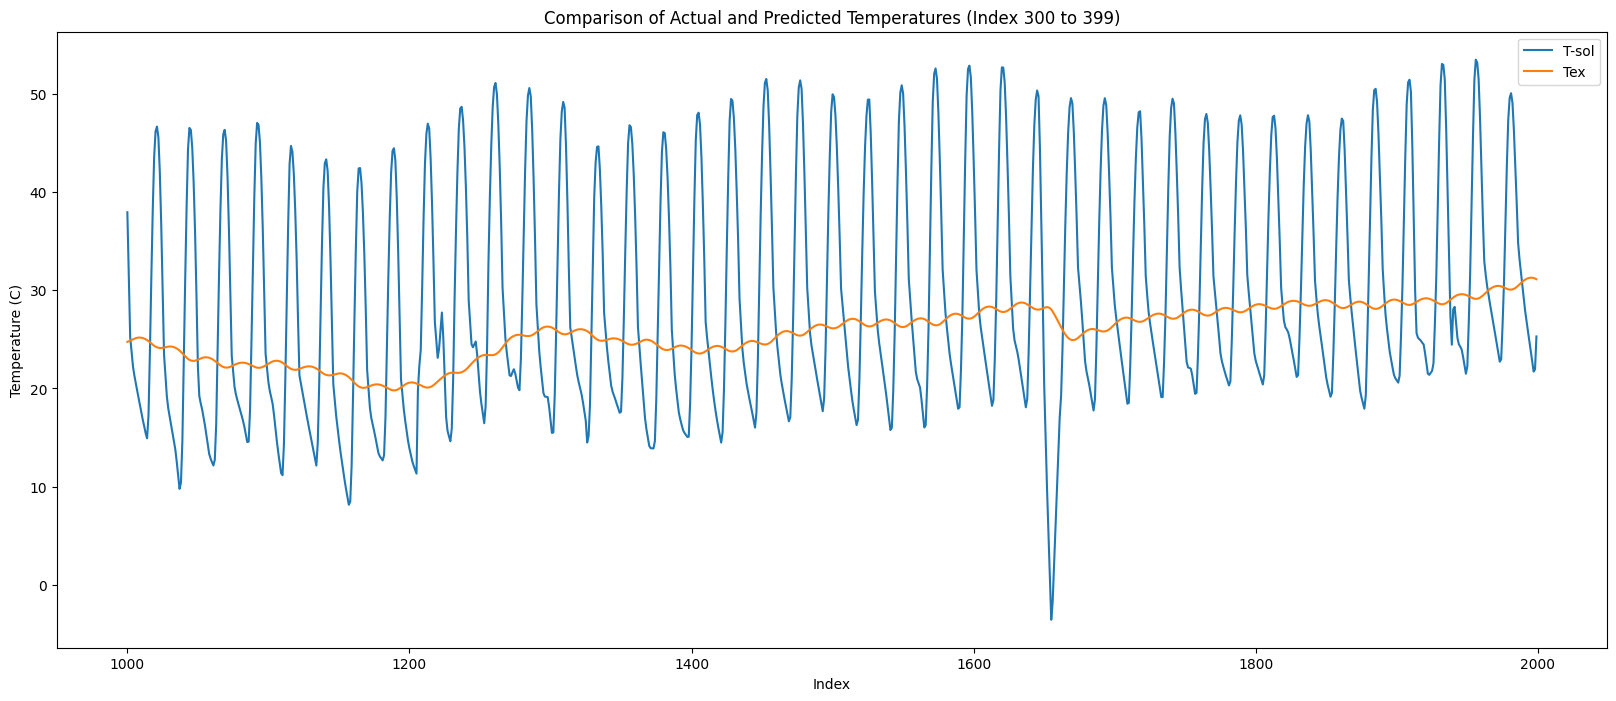

In [58]:
import matplotlib.pyplot as plt

# Assuming t_sol_subset and t_ex_subset are your actual and predicted values
plt.figure(figsize=(20, 8))  

# Subset the data for the specified index range

t_sol_subset = data['T_sol_air_f'].iloc[1000:2000]  # Subset of T_sol_air
t_ex_subset = data['[1] Surface Outside Face Temperature  (C)'].iloc[1000:2000]  # Subset of [1] Surface Outside Face Temperature  (C)

# Create a line plot for the subset of y_test and y_pred with respect to their index
plt.plot( t_sol_subset, label='T-sol')
plt.plot(t_ex_subset, label='Tex')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Temperature (C)')
plt.title('Comparison of Actual and Predicted Temperatures (Index 300 to 399)')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [59]:
data_ah=data.loc[data['Lats']==22.7196]
data_ah_90=data_ah.loc[data_ah['Orientation']==90]
data_ah_90_summer = data_ah_90[data_ah_90['Date/Time'].dt.month.isin([3, 4, 5])]


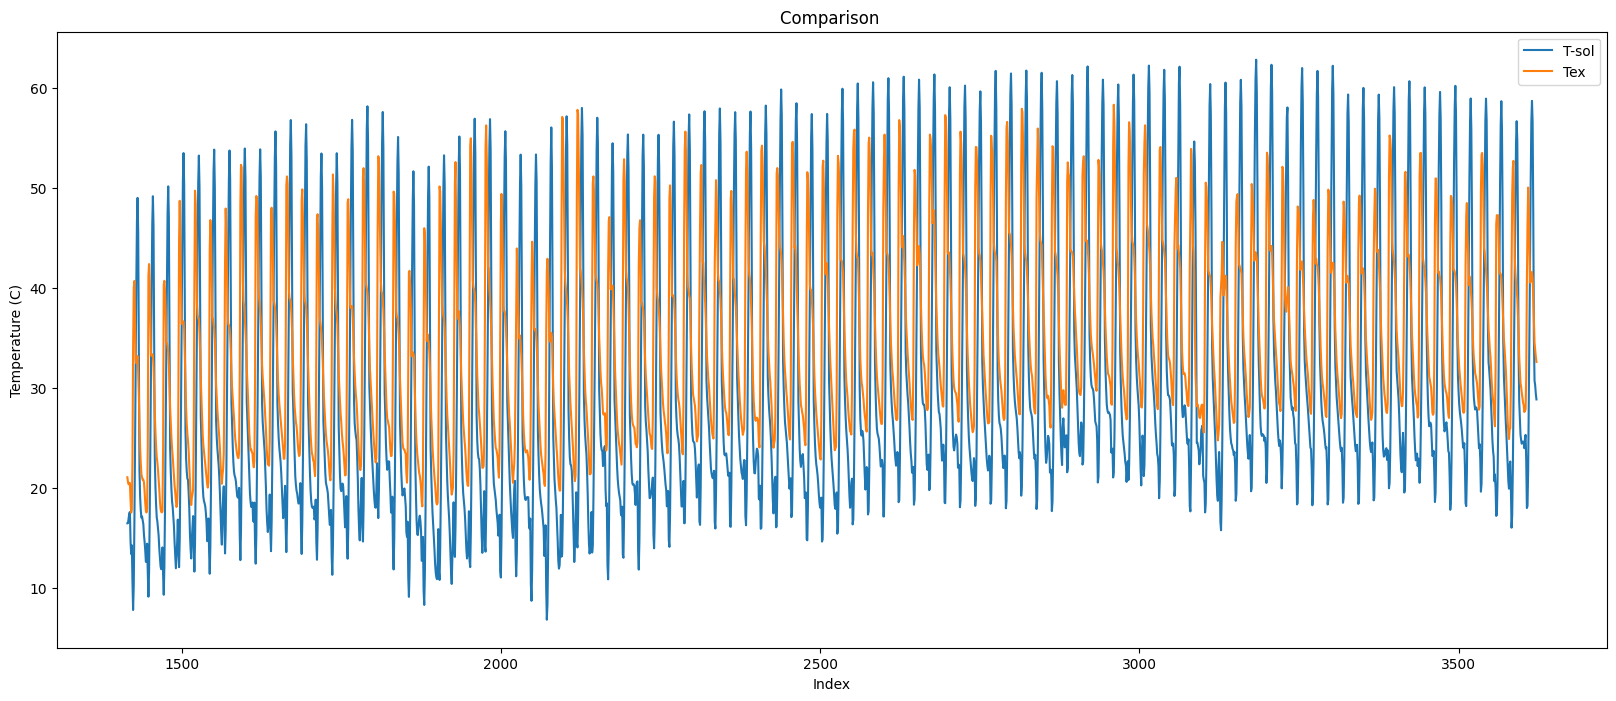

In [60]:
import matplotlib.pyplot as plt

# Assuming t_sol_subset and t_ex_subset are your actual and predicted values
plt.figure(figsize=(20, 8))  

# Subset the data for the specified index range

t_sol_subset = data_ah_90_summer['T_sol_air_f'] # Subset of T_sol_air
t_ex_subset = data_ah_90_summer['[1] Surface Outside Face Temperature  (C)'] # Subset of [1] Surface Outside Face Temperature  (C)

# Create a line plot for the subset of y_test and y_pred with respect to their index
plt.plot( t_sol_subset, label='T-sol')
plt.plot(t_ex_subset, label='Tex')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Temperature (C)')
plt.title('Comparison ')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [61]:
data_in=data.loc[data['Lats']==23.0225]
data_in_90=data_in.loc[data_in['Orientation']==90]
data_in_90_summer = data_in_90[data_in_90['Date/Time'].dt.month.isin([3, 4, 5])]

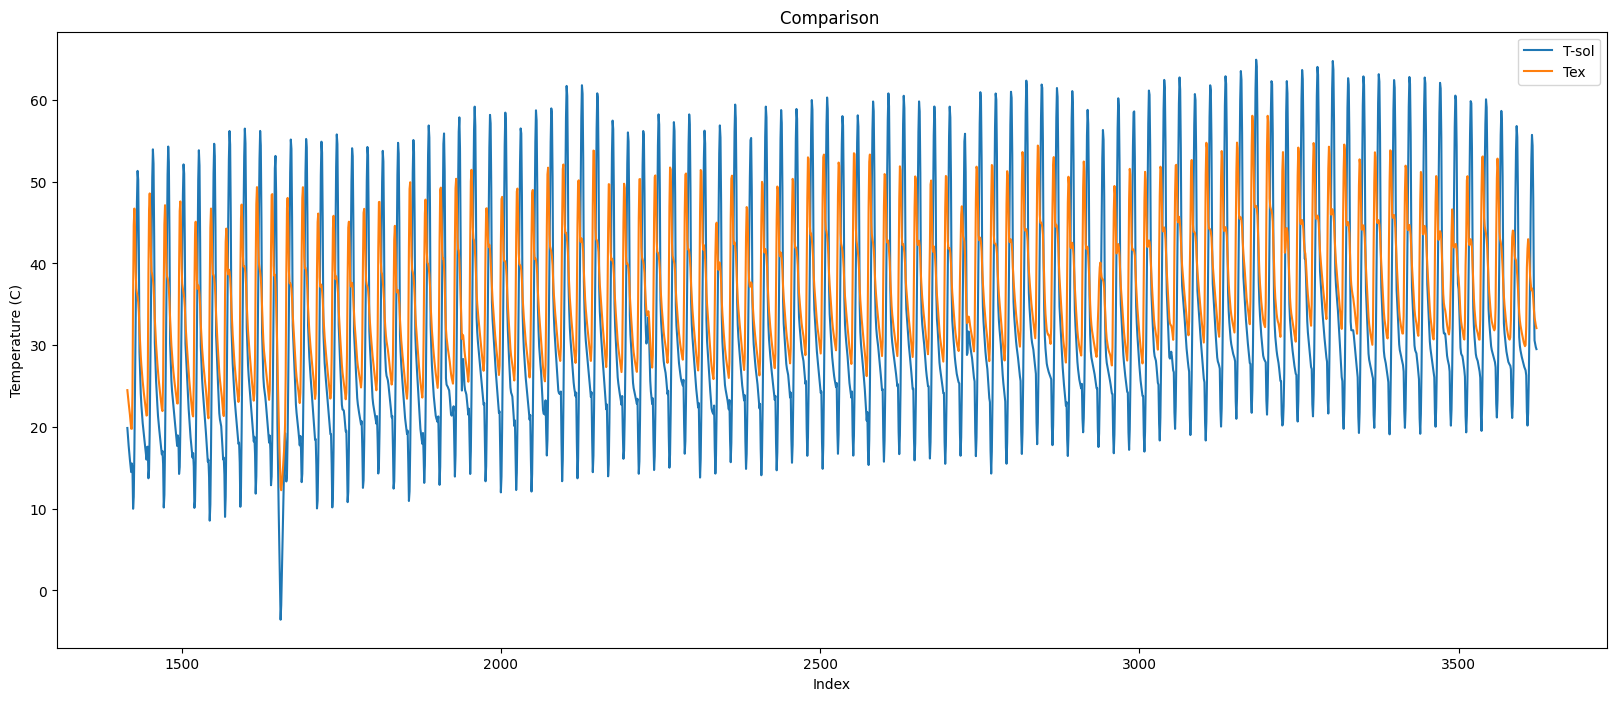

In [62]:
import matplotlib.pyplot as plt

# Assuming t_sol_subset and t_ex_subset are your actual and predicted values
plt.figure(figsize=(20, 8))  

# Subset the data for the specified index range

t_sol_subset = data_in_90_summer['T_sol_air_f'] # Subset of T_sol_air
t_ex_subset = data_in_90_summer['[1] Surface Outside Face Temperature  (C)'] # Subset of [1] Surface Outside Face Temperature  (C)

# Create a line plot for the subset of y_test and y_pred with respect to their index
plt.plot( t_sol_subset, label='T-sol')
plt.plot(t_ex_subset, label='Tex')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Temperature (C)')
plt.title('Comparison ')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [67]:
data_bh=data.loc[data['Lats']==23.2420]
data_bh_90=data_bh.loc[data_bh['Orientation']==90]
data_bh_90_summer = data_bh_90[data_bh_90['Date/Time'].dt.month.isin([3])]

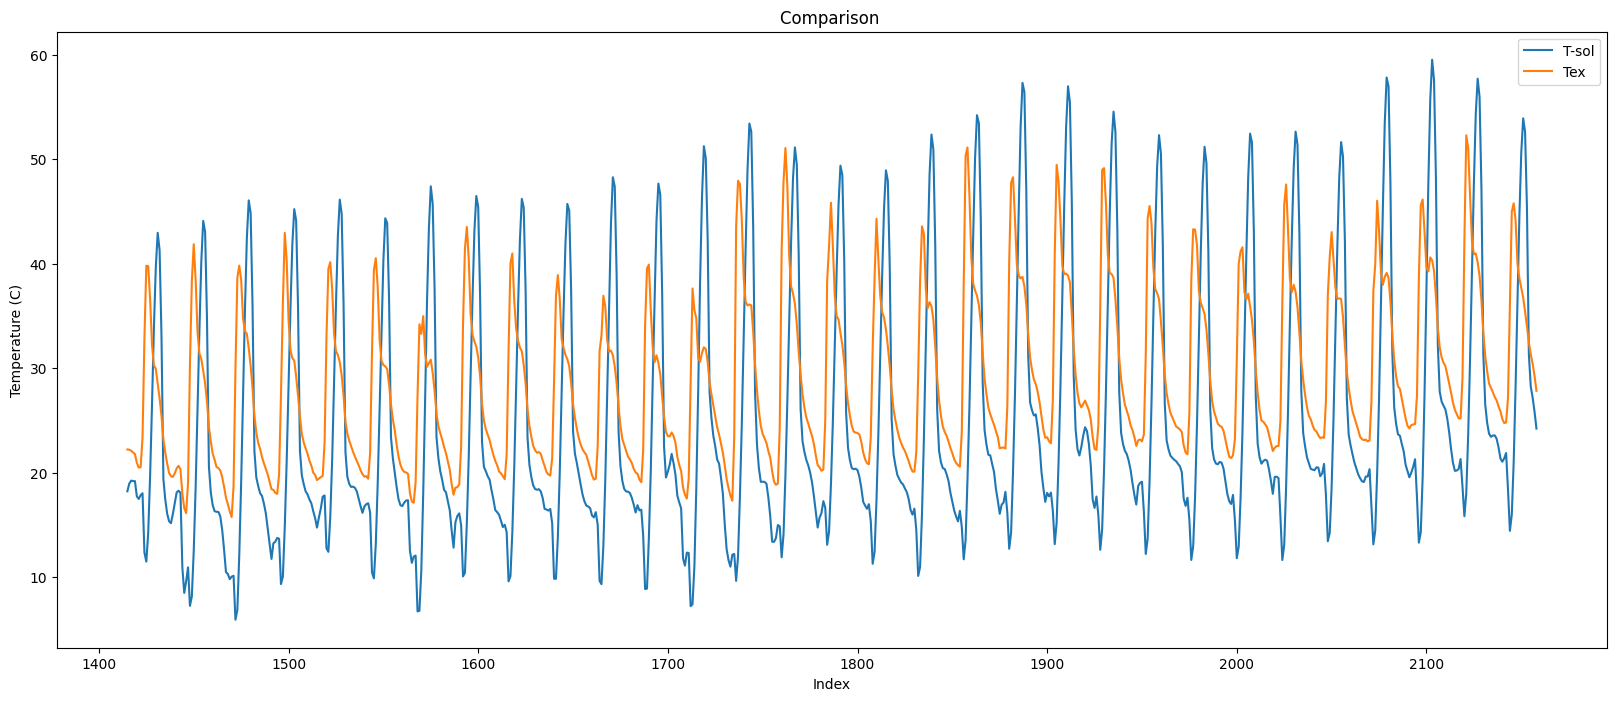

In [68]:
import matplotlib.pyplot as plt

# Assuming t_sol_subset and t_ex_subset are your actual and predicted values
plt.figure(figsize=(20, 8))  

# Subset the data for the specified index range

t_sol_subset = data_bh_90_summer['T_sol_air_f'] # Subset of T_sol_air
t_ex_subset = data_bh_90_summer['[1] Surface Outside Face Temperature  (C)'] # Subset of [1] Surface Outside Face Temperature  (C)

# Create a line plot for the subset of y_test and y_pred with respect to their index
plt.plot( t_sol_subset, label='T-sol')
plt.plot(t_ex_subset, label='Tex')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Temperature (C)')
plt.title('Comparison ')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [70]:
data_bh=data.loc[data['Lats']==23.2420]
data_bh_180=data_bh.loc[data_bh['Orientation']==180]
data_bh_180_summer = data_bh_180[data_bh_180['Date/Time'].dt.month.isin([3])]

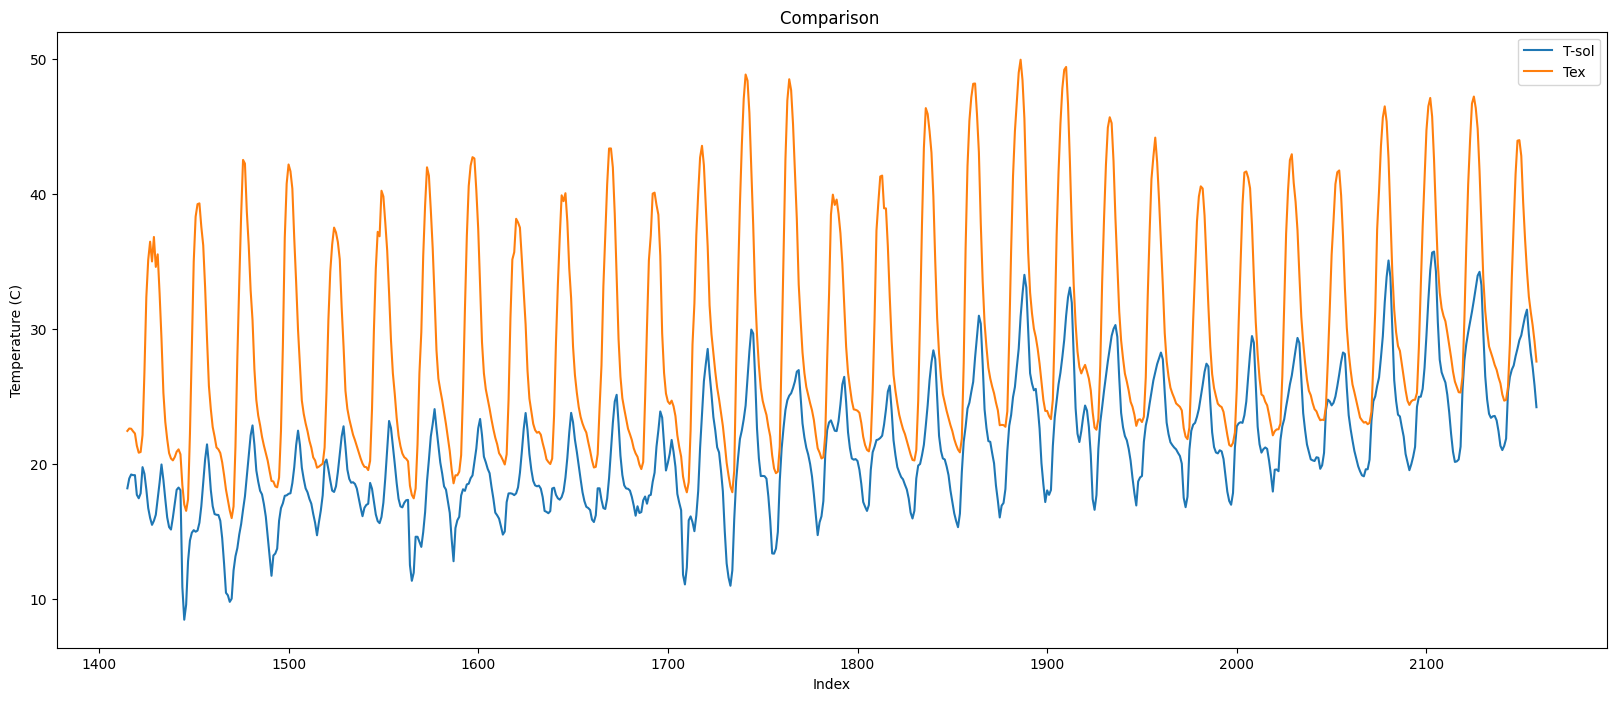

In [71]:
import matplotlib.pyplot as plt

# Assuming t_sol_subset and t_ex_subset are your actual and predicted values
plt.figure(figsize=(20, 8))  

# Subset the data for the specified index range

t_sol_subset = data_bh_180_summer['T_sol_air_f'] # Subset of T_sol_air
t_ex_subset = data_bh_180_summer['[1] Surface Outside Face Temperature  (C)'] # Subset of [1] Surface Outside Face Temperature  (C)

# Create a line plot for the subset of y_test and y_pred with respect to their index
plt.plot( t_sol_subset, label='T-sol')
plt.plot(t_ex_subset, label='Tex')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Temperature (C)')
plt.title('Comparison ')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [27]:
data.columns


Index(['Date/Time', '[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Direct Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Outdoor Air Dewpoint Temperature  (C)',
       '[1] Site Outdoor Air Drybulb Temperature  (C)',
       '[1] Site Solar Altitude Angle  (deg)',
       '[1] Site Solar Azimuth Angle  (deg)', '[1] Site Wind Direction  (deg)',
       '[1] Site Wind Speed  (m/s)',
       '[1] Surface Outside Face Temperature  (C)', 'Orientation', 'Lats',
       'Longs', '[1] Dry Bulb Temperature (C)',
       '[1] Global Horizontal Radiation (Wh/m2)', '[1] Relative Humidity ()',
       'day', 'Local Time', 'hra', 'declination', 'solar_zenith',
       'solar_azimuth', 'Wall Azimuth', 'AOI', 'Eb', 'Eg'],
      dtype='object')

In [28]:
data1 = data[data['Longs'] == 75.8577]
data1

,Date/Time,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Site Solar Azimuth Angle (deg),[1] Site Wind Direction (deg),[1] Site Wind Speed (m/s),[1] Surface Outside Face Temperature (C),...,day,Local Time,hra,declination,solar_zenith,solar_azimuth,Wall Azimuth,AOI,Eb,Eg
0,2002-01-01 01:00:00,0.0,0.0,10.025,16.225,-86.372044,134.556643,100.25,1.000,14.979317,...,1,2002-01-01 00:29:43.537300596,-172.75,-23.011637,176.372044,90.454883,180,89.971216,-0.0,0.0
1,2002-01-01 02:00:00,0.0,0.0,12.200,17.700,-72.772937,94.948776,25.50,0.200,15.521099,...,1,2002-01-01 01:29:43.537300596,-157.75,-23.011637,162.772937,91.808925,180,89.464351,-0.0,0.0
2,2002-01-01 03:00:00,0.0,0.0,11.900,17.500,-59.017201,97.406694,0.00,0.000,15.515694,...,1,2002-01-01 02:29:43.537300596,-142.75,-23.011637,149.017201,94.451539,180,87.710129,-0.0,0.0
3,2002-01-01 04:00:00,0.0,0.0,11.400,16.650,-45.350306,100.451697,0.00,0.000,15.189674,...,1,2002-01-01 03:29:43.537300596,-127.75,-23.011637,135.350306,98.218538,180,84.234315,-0.0,0.0
4,2002-01-01 05:00:00,0.0,0.0,6.800,11.900,-31.828097,103.937594,326.25,2.925,13.426783,...,1,2002-01-01 04:29:43.537300596,-112.75,-23.011637,121.828097,102.891999,180,79.072584,-0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2002-12-31 19:00:00,0.0,0.0,6.325,21.350,-12.176278,249.653350,3.75,0.025,23.663594,...,365,2002-12-31 18:30:10.473904572,97.50,-23.085911,102.176278,251.620438,270,21.930213,-0.0,0.0
8755,2002-12-31 20:00:00,0.0,0.0,6.550,18.375,-25.321975,254.015331,0.00,0.000,22.149918,...,365,2002-12-31 19:30:10.473904572,112.50,-23.085911,115.321975,256.954718,270,28.286356,-0.0,0.0
8756,2002-12-31 21:00:00,0.0,0.0,7.050,16.025,-38.737982,257.722237,30.75,0.000,20.445485,...,365,2002-12-31 20:30:10.473904572,127.50,-23.085911,128.737982,261.639714,270,39.490792,-0.0,0.0
8757,2002-12-31 22:00:00,0.0,0.0,7.575,14.450,-52.333160,260.924964,87.50,0.525,19.256711,...,365,2002-12-31 21:30:10.473904572,142.50,-23.085911,142.333160,265.422170,270,52.474128,-0.0,0.0


In [29]:
X = data1.drop(['[1] Site Outdoor Air Drybulb Temperature  (C)','[1] Surface Outside Face Temperature  (C)','Local Time','Date/Time','[1] Site Wind Direction  (deg)',
       '[1] Site Wind Speed  (m/s)','[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Direct Solar Radiation Rate per Area  (W/m2)','[1] Site Solar Altitude Angle  (deg)',
       '[1] Site Solar Azimuth Angle  (deg)','solar_azimuth',
       '[1] Site Outdoor Air Dewpoint Temperature  (C)','Orientation', 'Lats', 'declination','Wall Azimuth','solar_zenith',
       'Longs','[1] Relative Humidity ()','[1] Global Horizontal Radiation (Wh/m2)', 'hra','AOI',
       'day'], axis = 1)
Y = data1['[1] Surface Outside Face Temperature  (C)']
X.columns


Index(['[1] Dry Bulb Temperature (C)', 'Eb', 'Eg'], dtype='object')

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

In [31]:
reg = LinearRegression().fit(X_train, y_train)

In [32]:
reg.score(X_train, y_train)

0.8285207720745863

In [33]:
weights = reg.coef_

print("Coefficients:", weights)

Coefficients: [ 1.10260674e+00 -2.48245241e-05 -1.63291618e-02]


In [34]:
bias = reg.intercept_
bias

1.4955799042396336

In [35]:
reg.score(X_test, y_test)

0.8311424729395906

In [36]:
# Predict on the test set
y_pred = reg.predict(X_test)

# Create a DataFrame with y_test and y_pred
comparison_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
comparison_df

,y_test,y_pred
4861,33.386893,34.716510
7985,27.318470,28.389491
5769,25.882833,22.897764
6824,25.872427,25.019052
8637,17.485752,14.947382
...,...,...
1321,15.667817,16.270510
4761,34.139371,34.439411
7959,41.303034,37.065472
5924,26.828287,27.406838


In [37]:
# import matplotlib.pyplot as plt

# # Assuming y_test and y_pred are your actual and predicted values

# # Create a line plot for y_test and y_pred with respect to their index
# plt.plot(y_test.index, y_test, label='Actual')
# plt.plot(y_test.index, y_pred, label='Predicted')

# # Add labels and title
# plt.xlabel('Index')
# plt.ylabel('Values')
# plt.title('Comparison of Actual and Predicted Values')

# # Add legend
# plt.legend()

# # Show the plot
# plt.show()


In [38]:
# import matplotlib.pyplot as plt

# # Assuming y_test and y_pred are your actual and predicted values

# # Subset the index and corresponding values for the range 300 to 400
# index_subset = y_test.index[300:401]
# y_test_subset = y_test.iloc[300:401]
# y_pred_subset = y_pred[300:401]

# # Create a line plot for the subset of y_test and y_pred with respect to their index
# plt.plot(index_subset, y_test_subset, label='Actual')
# plt.plot(index_subset, y_pred_subset, label='Predicted')

# # Add labels and title
# plt.xlabel('Index')
# plt.ylabel('Values')
# plt.title('Comparison of Actual and Predicted Values (Index 300 to 400)')

# # Set x-axis limits
# plt.xlim(300, 400)

# # Add legend
# plt.legend()

# # Show the plot
# plt.show()


In [39]:
# data['[1] Site Direct Solar Radiation Rate per Area  (W/m2)'] = pd.to_numeric(data['[1] Site Direct Solar Radiation Rate per Area  (W/m2)'], errors='coerce')
# data['[1] Site Solar Azimuth Angle  (deg)'] = pd.to_numeric(data['[1] Site Solar Azimuth Angle  (deg)'], errors='coerce')

# data['solar gain'] = data['[1] Site Direct Solar Radiation Rate per Area  (W/m2)'] * data['cos_incident_angle'] +\
#                      data['[1] Site Direct Solar Radiation Rate per Area  (W/m2)'] * (1 + np.cos(np.radians(data['[1] Site Solar Azimuth Angle  (deg)'])) / 2)


In [40]:
# data['cos_altitude']=np.cos(np.radians(data['[1] Site Solar Altitude Angle  (deg)']))

In [41]:
# data

In [42]:
# plt.figure(figsize = (20,20))
# sns.heatmap(data.corr(),annot = True)

In [43]:
# plt.scatter(data['[1] Site Wind Speed  (m/s)'],data['[1] Site Direct Solar Radiation Rate per Area  (W/m2)'])

In [44]:
# Predict on the test set
y_pred = reg.predict(X_test)

# Create a DataFrame with y_test and y_pred
comparison_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
comparison_df.reset_index(drop=True, inplace=True)
comparison_df

,y_test,y_pred
0,33.386893,34.716510
1,27.318470,28.389491
2,25.882833,22.897764
3,25.872427,25.019052
4,17.485752,14.947382
...,...,...
7003,15.667817,16.270510
7004,34.139371,34.439411
7005,41.303034,37.065472
7006,26.828287,27.406838


In [45]:
# import matplotlib.pyplot as plt

# # Assuming y_test and y_pred are your actual and predicted values

# # Create a line plot for y_test and y_pred with respect to their index
# plt.plot(y_test.index, y_test, label='Actual')
# plt.plot(y_test.index, y_pred, label='Predicted')

# # Add labels and title
# plt.xlabel('Index')
# plt.ylabel('Values')
# plt.title('Comparison of Actual and Predicted Values')
# plt.xlim(300, 340)

# # Add legend
# plt.legend()

# # Show the plot
# plt.show()


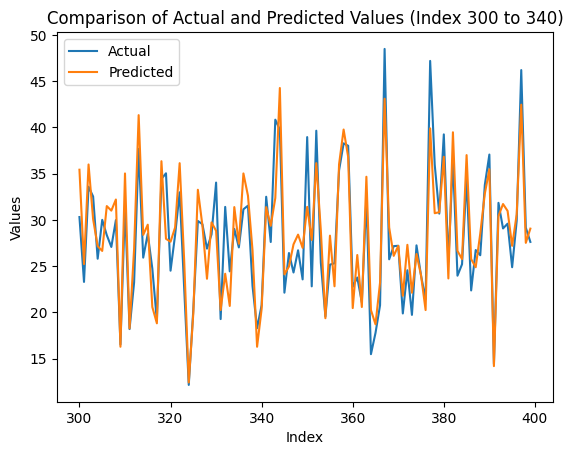

In [46]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your actual and predicted values

# Subset the data for the specified index range
index_range = range(300, 400)
y_test_subset = y_test.iloc[index_range]
y_pred_subset = y_pred[index_range]

# Create a line plot for the subset of y_test and y_pred with respect to their index
plt.plot(index_range, y_test_subset, label='Actual')
plt.plot(index_range, y_pred_subset, label='Predicted')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison of Actual and Predicted Values (Index 300 to 340)')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [47]:
# 

In [48]:
# Predict on the test set
y_predct = reg.predict(X)

# Create a DataFrame with y_test and y_pred
comparison_df_train = pd.DataFrame({'y_simulated': Y, 'y_pred': y_predct})
comparison_df_train

,y_simulated,y_pred
0,14.979317,20.680937
1,15.521099,21.121980
2,15.515694,20.680937
3,15.189674,19.578330
4,13.426783,12.962690
...,...,...
8754,23.663594,24.319539
8755,22.149918,20.901458
8756,20.445485,18.585984
8757,19.256711,17.042335


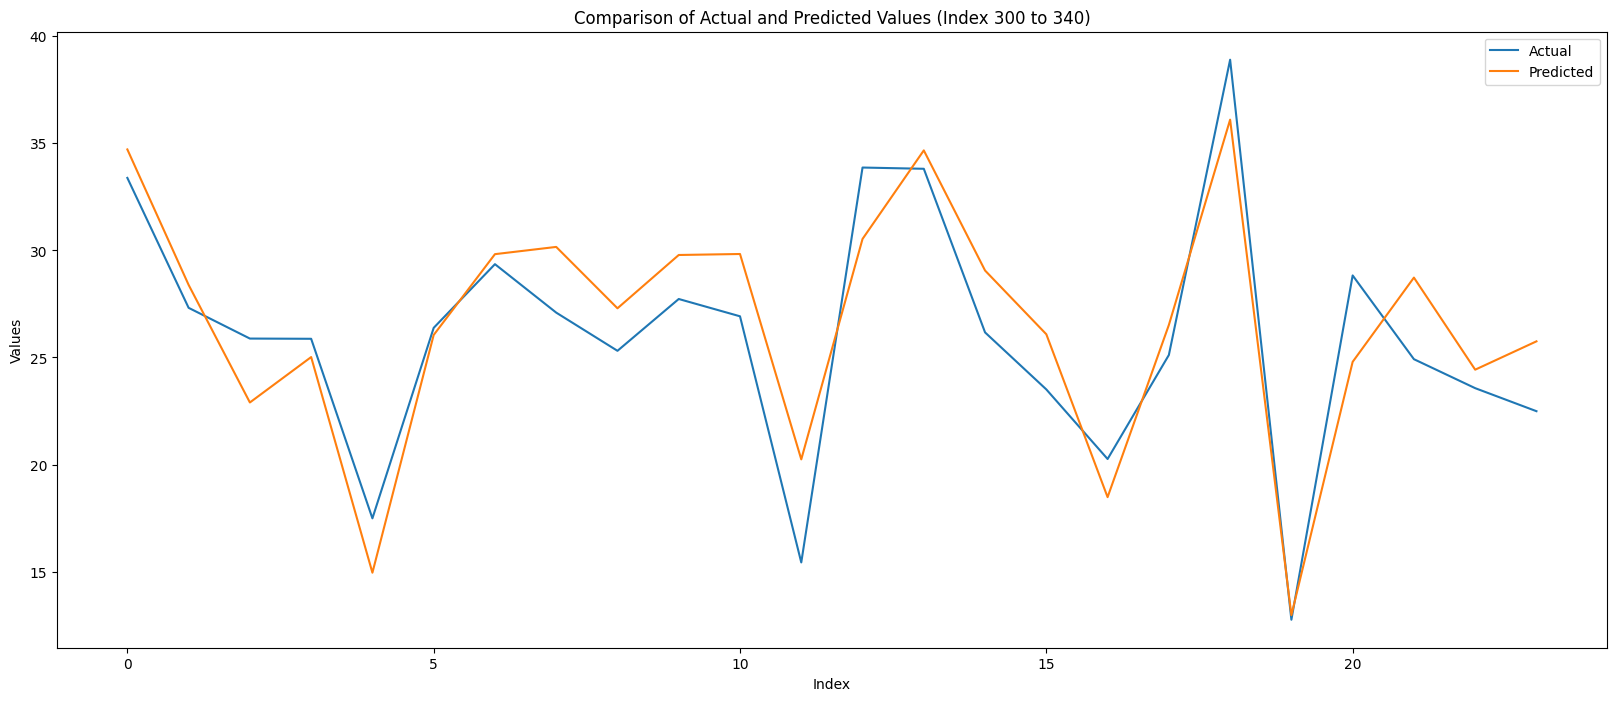

In [49]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your actual and predicted values
plt.figure(figsize=(20, 8))  
# Subset the data for the specified index range
index_range = range(0, 24)
y_test_subset = y_test.iloc[index_range]
y_pred_subset = y_pred[index_range]

# Create a line plot for the subset of y_test and y_pred with respect to their index
plt.plot(index_range, y_test_subset, label='Actual')
plt.plot(index_range, y_pred_subset, label='Predicted')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison of Actual and Predicted Values (Index 300 to 340)')

# Add legend
plt.legend()

# Show the plot
plt.show()


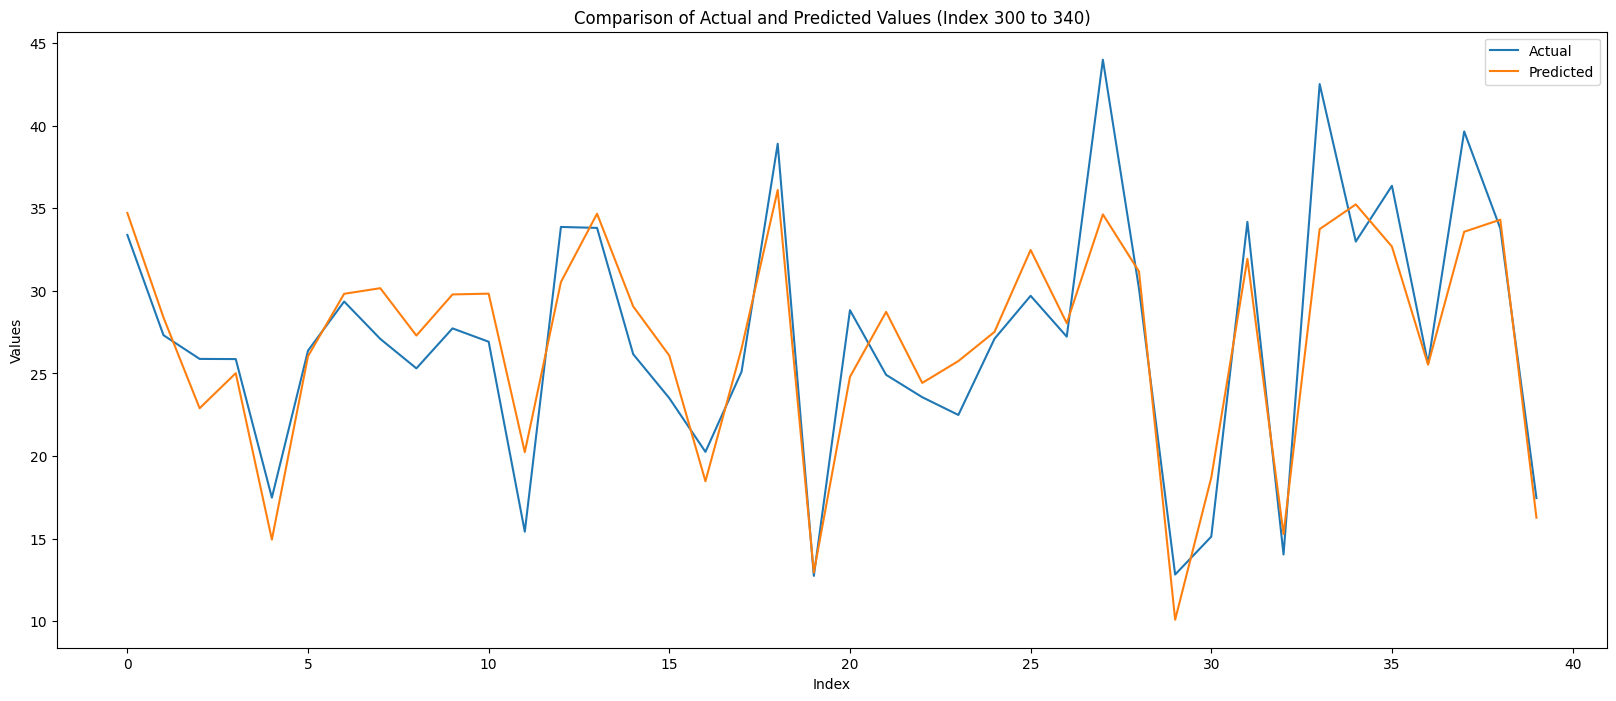

In [50]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your actual and predicted values
plt.figure(figsize=(20, 8))  
# Subset the data for the specified index range
index_range = range(0,40)
y_test_subset = y_test.iloc[index_range]
y_pred_subset = y_pred[index_range]

# Create a line plot for the subset of y_test and y_pred with respect to their index
plt.plot(index_range, y_test_subset, label='Actual')
plt.plot(index_range, y_pred_subset, label='Predicted')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison of Actual and Predicted Values (Index 300 to 340)')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [51]:
data

,Date/Time,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Site Solar Azimuth Angle (deg),[1] Site Wind Direction (deg),[1] Site Wind Speed (m/s),[1] Surface Outside Face Temperature (C),...,day,Local Time,hra,declination,solar_zenith,solar_azimuth,Wall Azimuth,AOI,Eb,Eg
0,2002-01-01 01:00:00,0.0,0.0,5.600,14.075,-86.550209,91.104045,220.00,2.925,17.425801,...,1,2002-01-01 00:16:34.825300596,-176.0,-23.011637,176.550209,90.039378,180,89.997630,-0.0,0.0
1,2002-01-01 02:00:00,0.0,0.0,6.500,13.550,-75.710457,93.157099,180.00,1.725,17.436224,...,1,2002-01-01 01:16:34.825300596,-161.0,-23.011637,165.710457,91.112878,180,89.725333,-0.0,0.0
2,2002-01-01 03:00:00,0.0,0.0,7.400,13.125,-61.958056,96.159063,45.00,0.350,17.430286,...,1,2002-01-01 02:16:34.825300596,-146.0,-23.011637,151.958056,93.517420,180,88.347207,-0.0,0.0
3,2002-01-01 04:00:00,0.0,0.0,7.825,12.400,-48.286846,99.382686,0.00,0.375,17.410444,...,1,2002-01-01 03:16:34.825300596,-131.0,-23.011637,138.286846,97.101033,180,85.281716,-0.0,0.0
4,2002-01-01 05:00:00,0.0,0.0,7.975,11.600,-34.749348,102.923038,0.00,0.875,17.374948,...,1,2002-01-01 04:16:34.825300596,-116.0,-23.011637,124.749348,101.652816,180,80.447095,-0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2002-12-31 19:00:00,0.0,0.0,6.325,21.350,-12.176278,249.653350,3.75,0.025,23.663594,...,365,2002-12-31 18:30:10.473904572,97.5,-23.085911,102.176278,251.620438,270,21.930213,-0.0,0.0
8755,2002-12-31 20:00:00,0.0,0.0,6.550,18.375,-25.321975,254.015331,0.00,0.000,22.149918,...,365,2002-12-31 19:30:10.473904572,112.5,-23.085911,115.321975,256.954718,270,28.286356,-0.0,0.0
8756,2002-12-31 21:00:00,0.0,0.0,7.050,16.025,-38.737982,257.722237,30.75,0.000,20.445485,...,365,2002-12-31 20:30:10.473904572,127.5,-23.085911,128.737982,261.639714,270,39.490792,-0.0,0.0
8757,2002-12-31 22:00:00,0.0,0.0,7.575,14.450,-52.333160,260.924964,87.50,0.525,19.256711,...,365,2002-12-31 21:30:10.473904572,142.5,-23.085911,142.333160,265.422170,270,52.474128,-0.0,0.0


In [52]:
new_data = data1.drop(['[1] Surface Outside Face Temperature  (C)','Local Time','[1] Site Wind Direction  (deg)',
       '[1] Site Wind Speed  (m/s)','[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Direct Solar Radiation Rate per Area  (W/m2)','[1] Site Solar Altitude Angle  (deg)',
       '[1] Site Solar Azimuth Angle  (deg)','solar_azimuth',
       '[1] Site Outdoor Air Dewpoint Temperature  (C)', 'declination','Wall Azimuth','solar_zenith',
       'hra','AOI',
       'day'], axis = 1)

In [53]:
new_data

,Date/Time,[1] Site Outdoor Air Drybulb Temperature (C),Orientation,Lats,Longs,[1] Dry Bulb Temperature (C),[1] Global Horizontal Radiation (Wh/m2),[1] Relative Humidity (),Eb,Eg
0,2002-01-01 01:00:00,16.225,0,22.7196,75.8577,17.4,0,68,-0.0,0.0
1,2002-01-01 02:00:00,17.700,0,22.7196,75.8577,17.8,0,71,-0.0,0.0
2,2002-01-01 03:00:00,17.500,0,22.7196,75.8577,17.4,0,69,-0.0,0.0
3,2002-01-01 04:00:00,16.650,0,22.7196,75.8577,16.4,0,72,-0.0,0.0
4,2002-01-01 05:00:00,11.900,0,22.7196,75.8577,10.4,0,70,-0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8754,2002-12-31 19:00:00,21.350,90,22.7196,75.8577,20.7,0,39,-0.0,0.0
8755,2002-12-31 20:00:00,18.375,90,22.7196,75.8577,17.6,0,48,-0.0,0.0
8756,2002-12-31 21:00:00,16.025,90,22.7196,75.8577,15.5,0,58,-0.0,0.0
8757,2002-12-31 22:00:00,14.450,90,22.7196,75.8577,14.1,0,65,-0.0,0.0


In [54]:
result_df = pd.concat([new_data,comparison_df_train], axis=1) 


In [55]:
result_df

,Date/Time,[1] Site Outdoor Air Drybulb Temperature (C),Orientation,Lats,Longs,[1] Dry Bulb Temperature (C),[1] Global Horizontal Radiation (Wh/m2),[1] Relative Humidity (),Eb,Eg,y_simulated,y_pred
0,2002-01-01 01:00:00,16.225,0,22.7196,75.8577,17.4,0,68,-0.0,0.0,14.979317,20.680937
1,2002-01-01 02:00:00,17.700,0,22.7196,75.8577,17.8,0,71,-0.0,0.0,15.521099,21.121980
2,2002-01-01 03:00:00,17.500,0,22.7196,75.8577,17.4,0,69,-0.0,0.0,15.515694,20.680937
3,2002-01-01 04:00:00,16.650,0,22.7196,75.8577,16.4,0,72,-0.0,0.0,15.189674,19.578330
4,2002-01-01 05:00:00,11.900,0,22.7196,75.8577,10.4,0,70,-0.0,0.0,13.426783,12.962690
...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2002-12-31 19:00:00,21.350,90,22.7196,75.8577,20.7,0,39,-0.0,0.0,23.663594,24.319539
8755,2002-12-31 20:00:00,18.375,90,22.7196,75.8577,17.6,0,48,-0.0,0.0,22.149918,20.901458
8756,2002-12-31 21:00:00,16.025,90,22.7196,75.8577,15.5,0,58,-0.0,0.0,20.445485,18.585984
8757,2002-12-31 22:00:00,14.450,90,22.7196,75.8577,14.1,0,65,-0.0,0.0,19.256711,17.042335


In [56]:
# result_df.to_csv('result.csv', index=False)


In [57]:
# %pip install openpyxl
# result_df.to_excel("result.xlsx") 


In [58]:
# result_df.to_excel("result.xlsx") 


In [59]:
# july_to_sept_data = result_df[ (result_df['Date/Time'].dt.month >= 7) & (result_df['Date/Time'].dt.month <= 9) ]

In [60]:
# july_to_sept_data

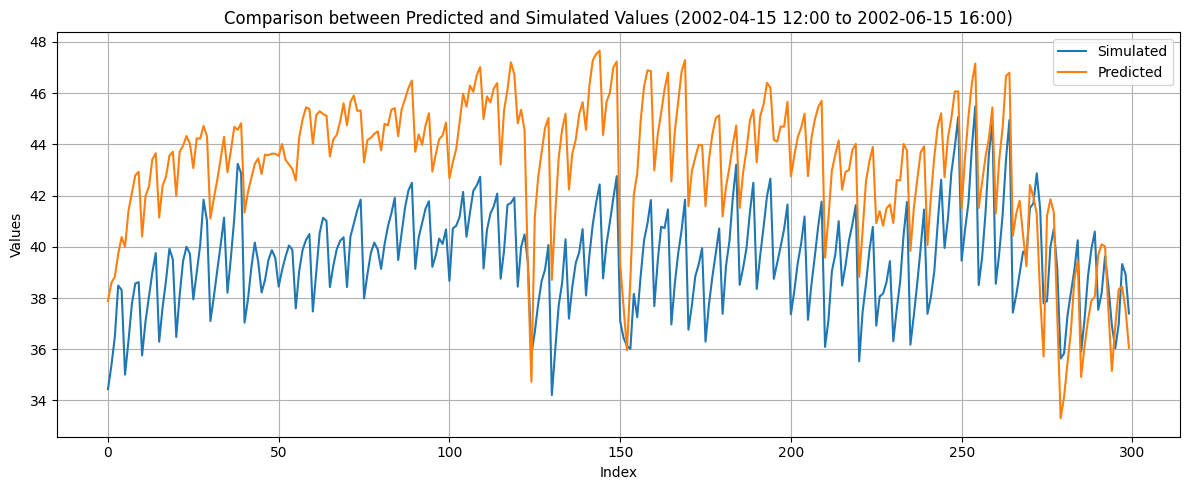

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the data in a DataFrame called result_df
# Ensure the 'Date/Time' column is in datetime format
result_df['Date/Time'] = pd.to_datetime(result_df['Date/Time'])

# Define the range of data you want to plot
start_date = '2002-04-15'
end_date = '2002-06-15'
start_hour = 12 # 8:00 AM
end_hour =16  # 6:00 PM

# Filter the DataFrame to include only the data within the specified date and hour ranges
filtered_data = result_df[
    (result_df['Date/Time'] >= start_date) & (result_df['Date/Time'] <= end_date) &
    (result_df['Date/Time'].dt.hour >= start_hour) & (result_df['Date/Time'].dt.hour <= end_hour)
]

# Define the range of indices you want to plot
index_range = range(0,300)

# Slice the filtered DataFrame using the index range
filtered_data_slice = filtered_data.iloc[index_range]

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(index_range, filtered_data_slice['y_simulated'], label='Simulated')
plt.plot(index_range, filtered_data_slice['y_pred'], label='Predicted')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison between Predicted and Simulated Values ({start_date} {start_hour}:00 to {end_date} {end_hour}:00)'.format(start_date=start_date, end_date=end_date, start_hour=start_hour, end_hour=end_hour))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [62]:
import pandas as pd

# Set display options
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns



filtered_data_slice.reset_index(drop=True)

,Date/Time,[1] Site Outdoor Air Drybulb Temperature (C),Orientation,Lats,Longs,[1] Dry Bulb Temperature (C),[1] Global Horizontal Radiation (Wh/m2),[1] Relative Humidity (),Eb,Eg,y_simulated,y_pred
0,2002-04-15 12:00:00,33.550,0,22.7196,75.8577,33.8,816,16,56.290913,53.868621,34.441404,37.882661
1,2002-04-15 13:00:00,34.325,0,22.7196,75.8577,34.5,1036,14,59.796635,57.939923,35.355631,38.587917
2,2002-04-15 14:00:00,34.875,0,22.7196,75.8577,35.0,991,15,83.628184,77.002717,36.462541,38.827350
3,2002-04-15 15:00:00,35.375,0,22.7196,75.8577,35.5,653,15,69.262693,56.340257,38.488357,39.716410
4,2002-04-15 16:00:00,35.725,0,22.7196,75.8577,35.8,617,15,54.908387,35.949682,38.313524,40.380510
5,2002-04-16 12:00:00,35.525,0,22.7196,75.8577,35.9,1048,13,68.881976,66.029497,35.004811,39.999245
6,2002-04-16 13:00:00,36.800,0,22.7196,75.8577,37.1,1156,12,63.386325,61.503641,36.310154,41.396413
7,2002-04-16 14:00:00,37.775,0,22.7196,75.8577,38.0,1056,12,85.609298,78.926476,37.759673,42.103707
8,2002-04-16 15:00:00,38.375,0,22.7196,75.8577,38.5,855,12,86.587611,70.522725,38.566651,42.792213
9,2002-04-16 16:00:00,38.275,0,22.7196,75.8577,38.2,786,12,64.244213,42.127068,38.621067,42.925663


In [50]:
import math

def AnisoSkyViewFactors(Ihorizon, Idome, Icircumsolar, DifSolarRad, S, Ih, m, I, Io, Z):
    a = max(0, math.cos(data['AOI']))
    b = max(0.087, math.cos(data['solar_zenith'])
    F1 = F11(epsilon) + F12(epsilon) * delta + F13(epsilon) * Z
    F2 = F21(epsilon) + F22(epsilon) * delta + F23(epsilon) * Z

    Isky = Ihorizon + Idome + Icircumsolar
    return Isky

def F11(epsilon):
    if 1.000 <= epsilon <= 1.065:
        return -0.0083117
    elif 1.065 < epsilon <= 1.230:
        return 0.1299457
    elif 1.230 < epsilon <= 1.500:
        return 0.3296958
    elif 1.500 < epsilon <= 1.950:
        return 0.5682053
    elif 1.950 < epsilon <= 2.800:
        return 0.8730280
    elif 2.800 < epsilon <= 4.500:
        return 1.1326077
    elif 4.500 < epsilon <= 6.200:
        return 1.0601591
    else:
        return 0.6777470

def F12(epsilon):
    if 1.000 <= epsilon <= 1.065:
        return 0.5877285
    elif 1.065 < epsilon <= 1.230:
        return 0.6825954
    elif 1.230 < epsilon <= 1.500:
        return 0.4868735
    elif 1.500 < epsilon <= 1.950:
        return 0.1874525
    elif 1.950 < epsilon <= 2.800:
        return -0.3920403
    elif 2.800 < epsilon <= 4.500:
        return -1.2367284
    elif 4.500 < epsilon <= 6.200:
        return -1.5999137
    else:
        return -0.3272588

def F13(epsilon):
    if 1.000 <= epsilon <= 1.065:
        return -0.0620636
    elif 1.065 < epsilon <= 1.230:
        return -0.1513752
    elif 1.230 < epsilon <= 1.500:
        return -0.2210958
    elif 1.500 < epsilon <= 1.950:
        return -0.2951290
    elif 1.950 < epsilon <= 2.800:
        return -0.3616149
    elif 2.800 < epsilon <= 4.500:
        return -0.4118494
    elif 4.500 < epsilon <= 6.200:
        return -0.3589221
    else:
        return -0.2504286

def F21(epsilon):
    if 1.000 <= epsilon <= 1.065:
        return -0.0596012
    elif 1.065 < epsilon <= 1.230:
        return -0.0189325
    elif 1.230 < epsilon <= 1.500:
        return 0.0554140
    elif 1.500 < epsilon <= 1.950:
        return 0.1088631
    elif 1.950 < epsilon <= 2.800:
        return 0.2255647
    elif 2.800 < epsilon <= 4.500:
        return 0.2877813
    elif 4.500 < epsilon <= 6.200:
        return 0.2642124
    else:
        return 0.1561313

def F22(epsilon):
    if 1.000 <= epsilon <= 1.065:
        return 0.0721249
    elif 1.065 < epsilon <= 1.230:
        return 0.0659650
    elif 1.230 < epsilon <= 1.500:
        return -0.0639588
    elif 1.500 < epsilon <= 1.950:
        return -0.1519229
    elif 1.950 < epsilon <= 2.800:
        return -0.4620442
    elif 2.800 < epsilon <= 4.500:
        return -0.8230357
    elif 4.500 < epsilon <= 6.200:
        return -1.1272340
    else:
        return -1.3765031

def F23(epsilon):
    if 1.000 <= epsilon <= 1.065:
        return -0.0220216
    elif 1.065 < epsilon <= 1.230:
        return -0.0288748
    elif 1.230 < epsilon <= 1.500:
        return -0.0260542
    elif 1.500 < epsilon <= 1.950:
        return -0.0139754
    elif 1.950 < epsilon <= 2.800:
        return 0.0012448
    elif 2.800 < epsilon <= 4.500:
        return 0.0558651
    elif 4.500 < epsilon <= 6.200:
        return 0.1310694
    else:
        return 0.2506212

def epsilon(Ih, I, Z):
    kappa = 1.041
    return ((Ih + I) / Ih + kappa * math.pow(Z, 3)) /(1 + kappa * math.pow(Z, 3))

def delta():
    beta = np.radians(data['[1] Site Solar Altitude Angle  (deg)'] )
    m = 1 / (np.sin(beta) + 0.50572 * ((6.07995 + beta) ** -1.6364))
    return ih*m/Io
    
Io = 1353   
Ihorizon = data['Ed']*F2 
Idome =data['Ed'](1-F2)*0.5     
Icircumsolar = data['Ed']*F1*a/b 

Ih = data['Ed'] 
  
I = data['Eb']   

Z=np.radians(data['solar_zenith'])
result = AnisoSkyViewFactors(Ihorizon, Idome, Icircumsolar, Ih, m, I, Io, Z)


SyntaxError: invalid syntax (801802513.py, line 6)

In [65]:
import numpy as np



def F11(epsilon):
    return np.piecewise(epsilon, 
                        [epsilon <= 1.065, 
                         (epsilon > 1.065) & (epsilon <= 1.230), 
                         (epsilon > 1.230) & (epsilon <= 1.500),
                         (epsilon > 1.500) & (epsilon <= 1.950),
                         (epsilon > 1.950) & (epsilon <= 2.800),
                         (epsilon > 2.800) & (epsilon <= 4.500),
                         (epsilon > 4.500) & (epsilon <= 6.200),
                         epsilon > 6.200],
                        [-0.0083117, 0.1299457, 0.3296958, 0.5682053, 0.8730280, 1.1326077, 1.0601591, 0.6777470])

def F12(epsilon):
    return np.piecewise(epsilon, 
                        [epsilon <= 1.065, 
                         (epsilon > 1.065) & (epsilon <= 1.230), 
                         (epsilon > 1.230) & (epsilon <= 1.500),
                         (epsilon > 1.500) & (epsilon <= 1.950),
                         (epsilon > 1.950) & (epsilon <= 2.800),
                         (epsilon > 2.800) & (epsilon <= 4.500),
                         (epsilon > 4.500) & (epsilon <= 6.200),
                         epsilon > 6.200],
                        [0.5877285, 0.6825954, 0.4868735, 0.1874525, -0.3920403, -1.2367284, -1.5999137, -0.3272588])

def F13(epsilon):
    return np.piecewise(epsilon, 
                        [epsilon <= 1.065, 
                         (epsilon > 1.065) & (epsilon <= 1.230), 
                         (epsilon > 1.230) & (epsilon <= 1.500),
                         (epsilon > 1.500) & (epsilon <= 1.950),
                         (epsilon > 1.950) & (epsilon <= 2.800),
                         (epsilon > 2.800) & (epsilon <= 4.500),
                         (epsilon > 4.500) & (epsilon <= 6.200),
                         epsilon > 6.200],
                        [-0.0620636, -0.1513752, -0.2210958, -0.2951290, -0.3616149, -0.4118494, -0.3589221, -0.2504286])

def F21(epsilon):
    return np.piecewise(epsilon, 
                        [epsilon <= 1.065, 
                         (epsilon > 1.065) & (epsilon <= 1.230), 
                         (epsilon > 1.230) & (epsilon <= 1.500),
                         (epsilon > 1.500) & (epsilon <= 1.950),
                         (epsilon > 1.950) & (epsilon <= 2.800),
                         (epsilon > 2.800) & (epsilon <= 4.500),
                         (epsilon > 4.500) & (epsilon <= 6.200),
                         epsilon > 6.200],
                        [-0.0596012, -0.0189325, 0.0554140, 0.1088631, 0.2255647, 0.2877813, 0.2642124, 0.1561313])

def F22(epsilon):
    return np.piecewise(epsilon, 
                        [epsilon <= 1.065, 
                         (epsilon > 1.065) & (epsilon <= 1.230), 
                         (epsilon > 1.230) & (epsilon <= 1.500),
                         (epsilon > 1.500) & (epsilon <= 1.950),
                         (epsilon > 1.950) & (epsilon <= 2.800),
                         (epsilon > 2.800) & (epsilon <= 4.500),
                         (epsilon > 4.500) & (epsilon <= 6.200),
                         epsilon > 6.200],
                        [0.0721249, 0.0659650, -0.0639588, -0.1519229, -0.4620442, -0.8230357, -1.1272340, -1.3765031])

def F23(epsilon):
    return np.piecewise(epsilon, 
                        [epsilon <= 1.065, 
                         (epsilon > 1.065) & (epsilon <= 1.230), 
                         (epsilon > 1.230) & (epsilon <= 1.500),
                         (epsilon > 1.500) & (epsilon <= 1.950),
                         (epsilon > 1.950) & (epsilon <= 2.800),
                         (epsilon > 2.800) & (epsilon <= 4.500),
                         (epsilon > 4.500) & (epsilon <= 6.200),
                         epsilon > 6.200],
                        [-0.0220216, -0.0288748, -0.0260542, -0.0139754, 0.0012448, 0.0558651, 0.1310694, 0.2506212])


def delta(data):
    beta = np.radians(data['[1] Site Solar Altitude Angle  (deg)'] )
    m = 1 / (np.sin(beta) + 0.50572 * ((6.07995 + beta) ** -1.6364))
    return Ih*m/Io

# Sample data initialization
# data = {
#     'AOI': 30,  # Example data
#     'solar_zenith': 45,  # Example data
#     '[1] Site Solar Altitude Angle  (deg)': 30,  # Example data
#     'Ed': 100,  # Example data
#     'Eb': 50,  # Example data
# }

# Constants
Io = 1353  # Example data
Ih = data['Calc_Ed']  # Example data
I = data['Calc_Eb']  # Example data
Z = np.radians(data['solar_zenith'])  # Example data
kappa = 1.041
epsilon=((Ih + I) / Ih + kappa * np.power(Z, 3)) /(1 + kappa * np.power(Z, 3))
# Calculations
F1 = F11(epsilon) + F12(epsilon) * delta(data) + F13(epsilon) * Z
F2 = F21(epsilon) + F22(epsilon) * delta(data) + F23(epsilon) * Z

Ihorizon = data['Calc_Ed'] * F2 
Idome = data['Calc_Ed'] * (1 - F2) * 0.5     
Icircumsolar = data['Calc_Ed'] * F1 * a / b
def AnisoSkyViewFactors(Ihorizon, Idome, Icircumsolar, Ih, m, I, Io, Z):
    a = max(0, math.cos(data['AOI']))
    b = max(0.087, math.cos(data['solar_zenith']))
    Isky = Ihorizon + Idome + Icircumsolar
    return Isky
data['Aniso_diffuse'] = AnisoSkyViewFactors(Ihorizon, Idome, Icircumsolar, Ih, m, I, Io, Z)


ValueError: with 1 condition(s), either 1 or 2 functions are expected